# Data Dictionary

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-za14{border-color:inherit;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-za14">Field Name</th>
    <th class="tg-7zrl">Data Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">id</td>
    <td class="tg-7zrl">string / unique identifier</td>
    <td class="tg-0lax">A unique identifier for each research paper.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">title</td>
    <td class="tg-7zrl">string</td>
    <td class="tg-0lax">The title of the research paper.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">category</td>
    <td class="tg-7zrl">string</td>
    <td class="tg-0lax">The arXiv category to which the paper is classified, such as 'Machine Learning' or 'Artificial Intelligence'.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">category_code</td>
    <td class="tg-7zrl">string</td>
    <td class="tg-0lax">The coded representation for the category of the paper, e.g., 'cs.LG' for Machine Learning and 'cs.AI' for Artificial Intelligence.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">published_date</td>
    <td class="tg-7zrl">date / string</td>
    <td class="tg-0lax">The publication date of the research paper.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">updated_date</td>
    <td class="tg-7zrl">date / string</td>
    <td class="tg-0lax">The last updated date for the paper.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">authors</td>
    <td class="tg-7zrl">string (list)</td>
    <td class="tg-0lax">A list of all authors who contributed to the research paper.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">first_author</td>
    <td class="tg-7zrl">string</td>
    <td class="tg-0lax">The first author mentioned in the paper's author list.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">summary</td>
    <td class="tg-7zrl">string</td>
    <td class="tg-0lax">A summary or abstract of the research paper.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">summary_word_count</td>
    <td class="tg-7zrl">integer</td>
    <td class="tg-0lax">The word count of the paper's summary.</td>
  </tr>
</tbody></table>

# Import necessary libraries

In [1]:
# Ensure contractions library is installed
! pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 6.0 MB/s eta 0:00:00


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arxiv-scientific-research-papers-dataset/arXiv_scientific dataset.csv


In [3]:
# Import all necessary libraries and load models
import pandas as pd
import numpy as np
import re
import contractions
from nltk.corpus import stopwords
import string
import spacy
from tqdm import tqdm
import warnings
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD, NMF, LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import umap
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud

# Suppress all warnings for a cleaner output.
warnings.filterwarnings('ignore')

# Download necessary NLTK data if not already present
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')

# Download and load spaCy model
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print("Downloading spaCy model 'en_core_web_sm'...")
    from spacy.cli import download
    download('en_core_web_sm')
    nlp = spacy.load('en_core_web_sm')

# Enable pandas to use tqdm for progress bars on apply functions.
tqdm.pandas()

2025-08-19 16:27:30.555505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755620850.914464      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755620851.005149      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load dataset

In [4]:
# Loading data
df = pd.read_csv('/kaggle/input/arxiv-scientific-research-papers-dataset/arXiv_scientific dataset.csv')
df = df.sample(frac=0.05, random_state=42)
df.head()

id                                              title  \
78358   abs-1704.04688v1         Machine Learning and the Future of Realism   
37291   abs-2405.16697v1  CNN Autoencoder Resizer: A Power-Efficient LoS...   
132977  abs-2109.03754v2  Memory and Knowledge Augmented Language Models...   
69011   abs-2102.07318v4  A Global to Local Double Embedding Method for ...   
57403   abs-1812.05788v2  AU R-CNN: Encoding Expert Prior Knowledge into...   

                                                 category category_code  \
78358                       Machine Learning (Statistics)       stat.ML   
37291                                    Machine Learning         cs.LG   
132977  Computation and Language (Natural Language Pro...         cs.CL   
69011             Computer Vision and Pattern Recognition         cs.CV   
57403             Computer Vision and Pattern Recognition         cs.CV   

       published_date updated_date  \
78358         4/15/17      4/15/17   
37291         5/26/24      5/26/24   
132977         9/8/21      9/14/21   
69011         2/15/21     10/17/21   
57403        12/14/18      8/25/19   

                                                  authors  \
78358                    ['Giles Hooker', 'Cliff Hooker']   
37291   ['Azim Akhtarshenas', 'Navid Ayoobi', 'David L...   
132977                   ['David Wilmot', 'Frank Keller']   
69011   ['Yiming Xu', 'Jiaxin Li', 'Yiheng Peng', 'Yan...   
57403               ['Chen Ma', 'Li Chen', 'Junhai Yong']   

               first_author  \
78358        'Giles Hooker'   
37291   'Azim Akhtarshenas'   
132977       'David Wilmot'   
69011           'Yiming Xu'   
57403             'Chen Ma'   

                                                  summary  summary_word_count  
78358   The preceding three decades have seen the emer...                 106  
37291   Optimizing the design, performance, and resour...                 143  
132977  Measuring event salience is essential in the u...                 115  
69011   Multi-person pose estimation is a fundamental ...                 212  
57403   Detecting action units (AUs) on human faces is...                 245

In [5]:
df = df[["title","category", "summary"]]
df.head()

title  \
78358          Machine Learning and the Future of Realism   
37291   CNN Autoencoder Resizer: A Power-Efficient LoS...   
132977  Memory and Knowledge Augmented Language Models...   
69011   A Global to Local Double Embedding Method for ...   
57403   AU R-CNN: Encoding Expert Prior Knowledge into...   

                                                 category  \
78358                       Machine Learning (Statistics)   
37291                                    Machine Learning   
132977  Computation and Language (Natural Language Pro...   
69011             Computer Vision and Pattern Recognition   
57403             Computer Vision and Pattern Recognition   

                                                  summary  
78358   The preceding three decades have seen the emer...  
37291   Optimizing the design, performance, and resour...  
132977  Measuring event salience is essential in the u...  
69011   Multi-person pose estimation is a fundamental ...  
57403   Detecting action units (AUs) on human faces is...

# Split data into train and test dataset

In [6]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

print("Shape of Train:", train.shape)
print("Shape of Test:", test.shape)

Shape of Train: (5449, 3)
Shape of Test: (1363, 3)


# Data Visualization

In [7]:
train

title  \
70405   Learning Occlusion-Aware Coarse-to-Fine Depth ...   
85225   Forecasting with sktime: Designing sktime's Ne...   
121330           Topic-Aware Multi-turn Dialogue Modeling   
96041   Improving the Improved Training of Wasserstein...   
46239   Dominant Z-Eigenpairs of Tensor Kronecker Prod...   
...                                                   ...   
95172   A Robust Multi-Batch L-BFGS Method for Machine...   
114928  Best-Worst Scaling More Reliable than Rating S...   
120365  Handling Syntactic Divergence in Low-resource ...   
110417  Using Recurrent Neural Networks to Optimize Dy...   
96386                     Curriculum Adversarial Training   

                                                 category  \
70405             Computer Vision and Pattern Recognition   
85225                                    Machine Learning   
121330  Computation and Language (Natural Language Pro...   
96041             Computer Vision and Pattern Recognition   
46239                     Social and Information Networks   
...                                                   ...   
95172                            Optimization and Control   
114928  Computation and Language (Natural Language Pro...   
120365  Computation and Language (Natural Language Pro...   
110417                                    Quantum Physics   
96386                                    Machine Learning   

                                                  summary  
70405   Self-supervised monocular depth estimation, ai...  
85225   We present a new open-source framework for for...  
121330  In the retrieval-based multi-turn dialogue mod...  
96041   Despite being impactful on a variety of proble...  
46239   Tensor Kronecker products, the natural general...  
...                                                   ...  
95172   This paper describes an implementation of the ...  
114928  Rating scales are a widely used method for dat...  
120365  Despite impressive empirical successes of neur...  
110417  We utilize machine learning models which are b...  
96386   Recently, deep learning has been applied to ma...  

[5449 rows x 3 columns]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5449 entries, 70405 to 96386
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     5449 non-null   object
 1   category  5449 non-null   object
 2   summary   5449 non-null   object
dtypes: object(3)
memory usage: 170.3+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1363 entries, 36305 to 100946
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1363 non-null   object
 1   category  1363 non-null   object
 2   summary   1363 non-null   object
dtypes: object(3)
memory usage: 42.6+ KB


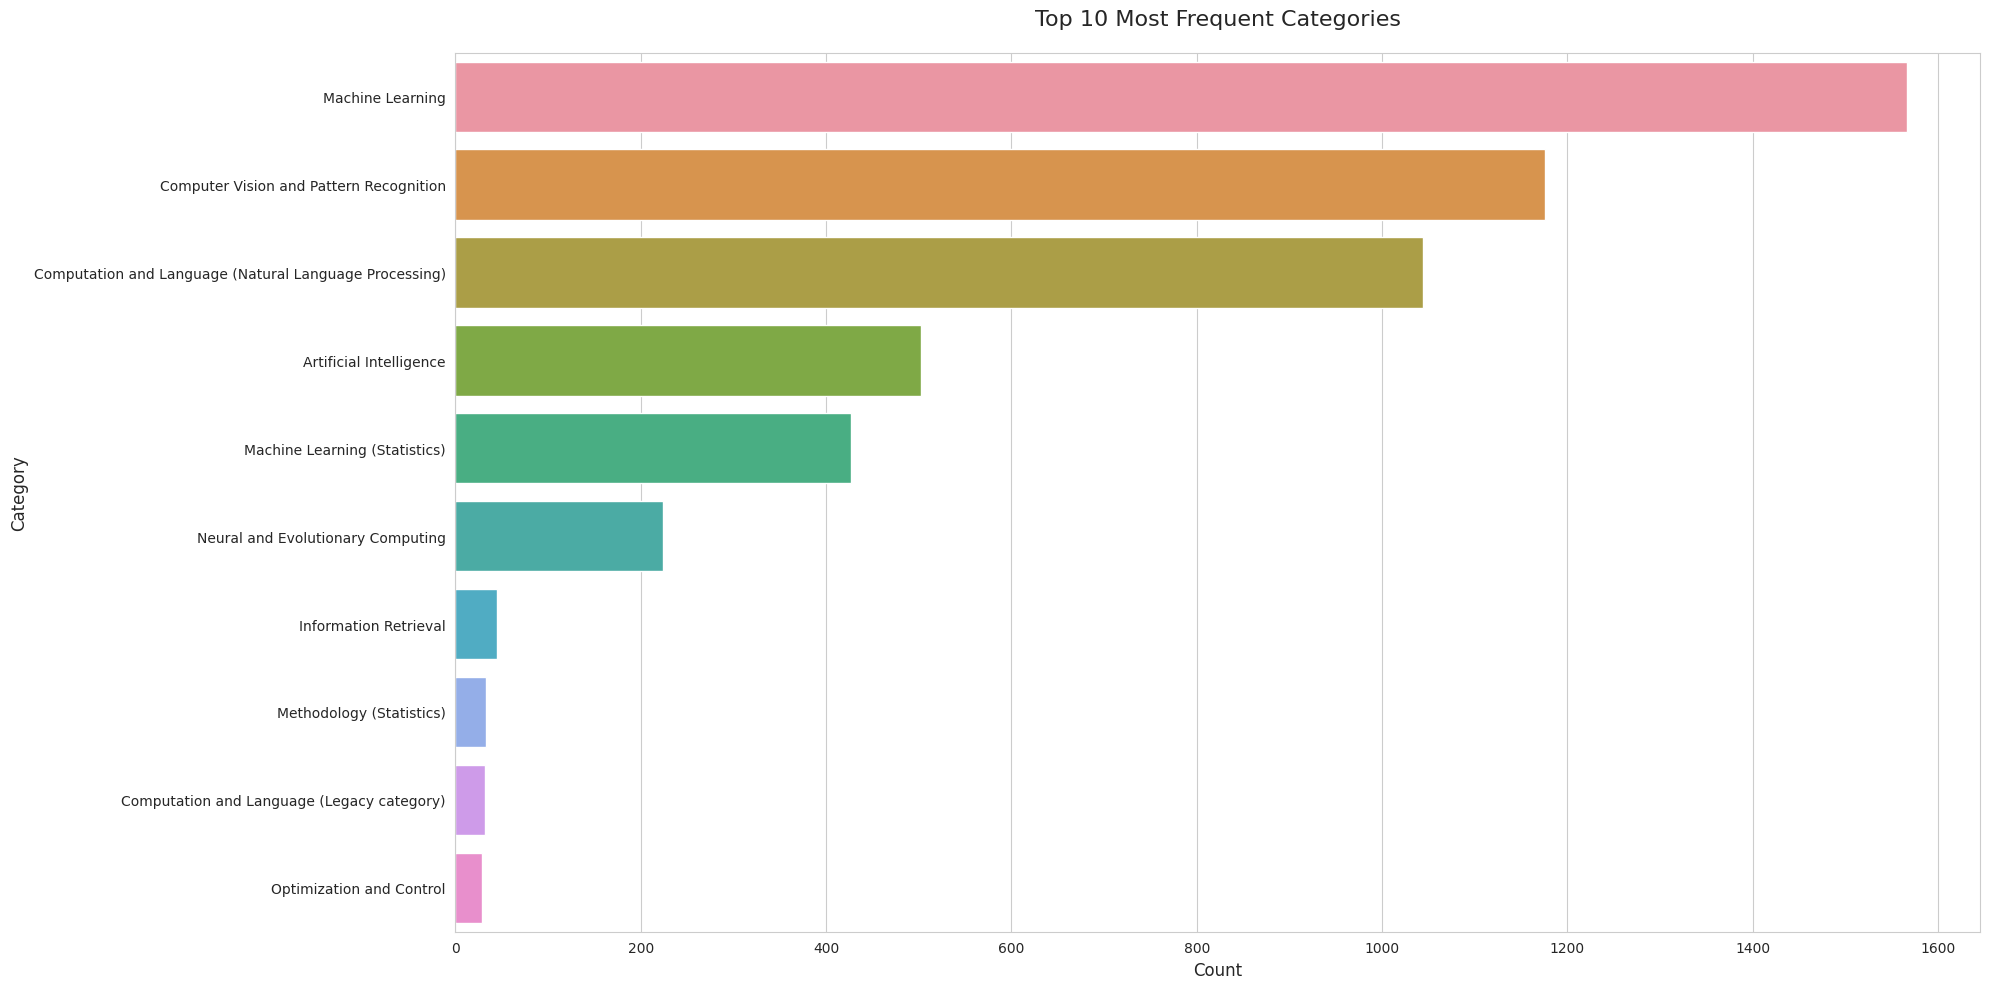

In [10]:
def visualize_top_categories(df):
    """
    Analyzes a DataFrame with a 'category' column to find the top 10
    most frequent categories and visualizes the results.

    Args:
        df (pd.DataFrame): DataFrame with a 'category' column.
    """
    # 1. Count the frequency of each category
    category_counts = df['category'].value_counts().reset_index()
    category_counts.columns = ['Category', 'Count']

    # 2. Find the Top 10 Categories with the highest counts
    top_10_categories = category_counts.nlargest(10, 'Count')

    # 3. Visualization
    # Set the style and palette for the plot
    sns.set_style("whitegrid")
    sns.set_palette("viridis")

    # Create a figure for the plot
    plt.figure(figsize=(20, 10))

    # Plot the horizontal bar chart
    sns.barplot(
        x='Count',
        y='Category',
        data=top_10_categories,
        orient='h'
    )

    # Add titles and labels for clarity
    plt.title('Top 10 Most Frequent Categories', fontsize=16, pad=20)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Category', fontsize=12)

    # Adjust layout to prevent labels from overlapping
    plt.tight_layout()
    plt.show()

visualize_top_categories(train)

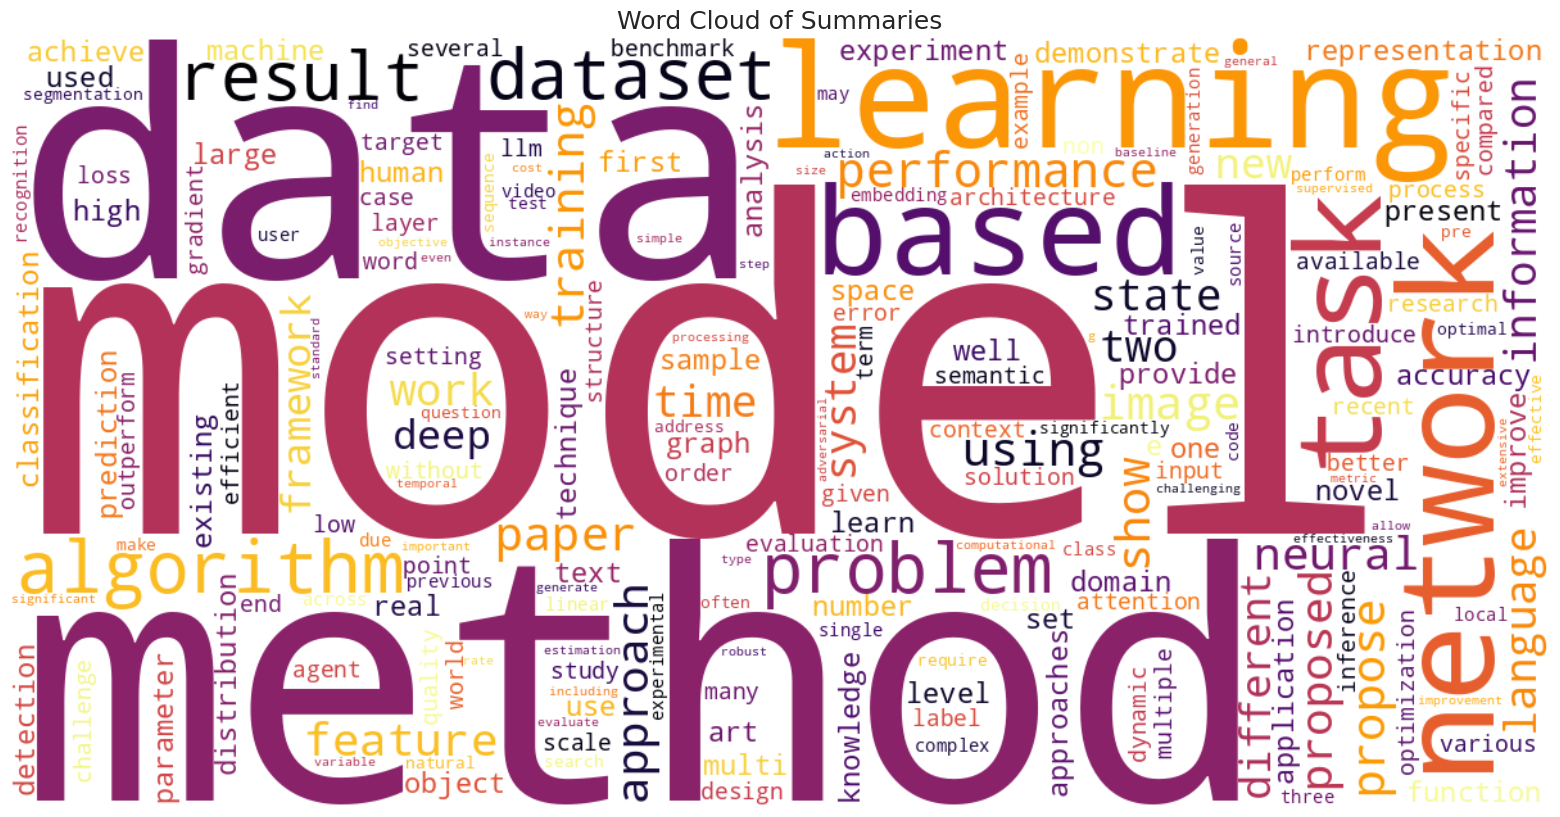

In [11]:
def create_wordcloud(df):
    """
    Generates and displays a word cloud from the 'summary' column of a DataFrame.

    Args:
        df (pd.DataFrame): DataFrame with a 'summary' column.
    """
    # 1. Prepare the text data.
    # We combine all summary text into one large string.
    # Drop NA values to ensure only valid strings are processed.
    all_text = ' '.join(
        df['summary']
        .astype(str)
        .str.lower()
        .dropna()
    )

    # 2. Generate the word cloud.
    # The 'width' and 'height' parameters control the size of the output image.
    # 'background_color' can be set to any color you prefer.
    # 'max_words' limits the number of words to display.
    # 'collocations=False' is used to prevent the word cloud from grouping
    # common pairs of words into a single entry.
    wordcloud = WordCloud(
        width=1200,
        height=600,
        background_color='white',
        colormap='inferno',
        max_words=200,
        collocations=False
    ).generate(all_text)

    # 3. Display the generated image.
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes for a cleaner look
    plt.title('Word Cloud of Summaries', fontsize=18)
    plt.show()

create_wordcloud(train)

# Feature Engineering

In [12]:
x_train = train[["summary"]]
x_test = test[["summary"]]

# Print the shapes to verify the split
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)

Shape of X_train: (5449, 1)
Shape of X_test: (1363, 1)


## Text Cleaning

## Example of preprocess and visualize preprocess

In [13]:
# Define text cleaning function
def clean_text(text):
    """
    Performs basic text cleaning: contraction expansion, lowercase,
    punctuation/number/stopword removal.

    Args:
        text (str): The input text to be cleaned.

    Returns:
        str: The cleaned text string.
    """
    # Check for NaN values and return an empty string if found.
    if pd.isna(text):
        return ''

    # 1. Ensure the input is a string.
    text = str(text)

    # 2. Expand contractions (e.g., "don't" -> "do not")
    text = contractions.fix(text)

    # 3. Convert to lowercase
    text = text.lower()

    # 4. Handle specific non-review entries
    if text.strip() in ['no negative', 'nothing', 'no positive']:
        return ''

    # 5. Remove punctuation and numbers
    text = re.sub(r'[\d' + re.escape(string.punctuation) + ']+', '', text)

    # 6. Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    cleaned_words = [
        word
        for word in words
        if word not in stop_words and len(word) > 1  # remove single-char words
    ]

    return ' '.join(cleaned_words)


# Define advanced spaCy-based preprocessing functions
def lemmatize_text(text):
    """
    Uses spaCy to perform lemmatization on a text string.
    
    Args:
        text (str): The text to process.

    Returns:
        str: The lemmatized text string.
    """
    # Create a spaCy Doc object
    doc = nlp(text)

    # Lemmatize and handle the special spaCy pronoun lemma "-PRON-"
    lemmas = [token.lower_ if token.lemma_ == "-PRON-" else token.lemma_ for token in doc]
    
    return " ".join(lemmas)

def filter_by_pos(text):
    """
    Filters a text string to keep only specified parts of speech.
    
    Args:
        text (str): The text string to filter.
        
    Returns:
        str: The filtered text string containing only allowed POS tags.
    """
    # Create a spaCy Doc object from the input text
    doc = nlp(text)

    # Define the parts of speech we want to keep.
    allowed_pos = {'NOUN', 'PROPN', 'ADJ', 'VERB'}

    # Filter tokens based on their POS tag.
    filtered_tokens = [token.text for token in doc if token.pos_ in allowed_pos]

    return " ".join(filtered_tokens)



# Apply the full preprocessing pipeline step-by-step
# A sample review text for demonstration.
sample_review = "We stayed at the Marriott hotel in New York City for 2 nights in August 2024. We booked the room through Expedia and were very pleased with the discount we received. The receptionist, a very kind Brazilian man named Carlos, made our check-in seamless. The hotel is located right next to Central Park. Overall, the staff were fantastic and we will be back!"

print("="*50)
print("Step 1: Original Review Text")
print("="*50)
print(sample_review)

# Apply the basic text cleaning function first.
cleaned_text = clean_text(sample_review)
print("\n" + "="*50)
print("Step 2: Cleaned Text")
print("="*50)
print(cleaned_text)

# Apply lemmatization to the cleaned text and display word-by-word.
lemmatized_doc = nlp(cleaned_text)
print("\n" + "="*50)
print("Step 3: Lemmatization Word-by-Word")
print("="*50)
for token in lemmatized_doc:
    print(f"{token.text} => {token.lemma_}")

lemmatized_text = " ".join([token.lower_ if token.lemma_ == "-PRON-" else token.lemma_ for token in lemmatized_doc])
print("\n" + "="*50)
print("Step 3: Lemmatized Text")
print("="*50)
print(lemmatized_text)


# Show the Part-of-Speech (POS) tags for each word in the lemmatized text.
pos_doc = nlp(lemmatized_text)
print("\n" + "="*50)
print("Step 4: Part-of-Speech (POS) Tagging")
print("="*50)
for token in pos_doc:
    print(f"{token.text} => {token.pos_}")

# Apply POS filtering to the lemmatized text.
final_processed_text = filter_by_pos(lemmatized_text)
print("\n" + "="*50)
print("Step 5: Final Preprocessed Text (After POS Filtering)")
print("="*50)
print(final_processed_text)

Step 1: Original Review Text
We stayed at the Marriott hotel in New York City for 2 nights in August 2024. We booked the room through Expedia and were very pleased with the discount we received. The receptionist, a very kind Brazilian man named Carlos, made our check-in seamless. The hotel is located right next to Central Park. Overall, the staff were fantastic and we will be back!

Step 2: Cleaned Text
stayed marriott hotel new york city nights august booked room expedia pleased discount received receptionist kind brazilian man named carlos made checkin seamless hotel located right next central park overall staff fantastic back

Step 3: Lemmatization Word-by-Word
stayed => stay
marriott => marriott
hotel => hotel
new => new
york => york
city => city
nights => night
august => august
booked => book
room => room
expedia => expedia
pleased => pleased
discount => discount
received => receive
receptionist => receptionist
kind => kind
brazilian => brazilian
man => man
named => name
carlos =>

In [14]:
def clean_text(text):
    """
    Performs basic text cleaning: contraction expansion, lowercase,
    punctuation/number/stopword removal.

    Args:
        text (str): The input text to be cleaned.

    Returns:
        str: The cleaned text string.
    """
    # Check for NaN values and return an empty string if found.
    if pd.isna(text):
        return ''

    # 1. Ensure the input is a string.
    text = str(text)

    # 2. Expand contractions (e.g., "don't" -> "do not")
    text = contractions.fix(text)

    # 3. Convert to lowercase
    text = text.lower()

    # 4. Remove punctuation and numbers
    text = re.sub(r'[\d' + re.escape(string.punctuation) + ']+', '', text)

    # 5. Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    cleaned_words = [
        word
        for word in words
        if word not in stop_words and len(word) > 1  # remove single-char words
    ]

    return ' '.join(cleaned_words)

def clean_dataframe(df, column_name):
    """
    Applies the text cleaning pipeline to a single DataFrame column.

    Args:
        df (pd.DataFrame): The DataFrame to process.
        column_name (str): The name of the text column to clean.

    Returns:
        pd.DataFrame: A DataFrame with a new column for cleaned text.
    """
    cleaned_column_name = 'cleaned_' + column_name
    print(f"Applying text cleaning to '{column_name}' and creating a new column '{cleaned_column_name}'...")
    df[cleaned_column_name] = df[column_name].apply(clean_text)
    return df

# --- Apply cleaning to 'summary' column on train and test datasets ---

train = clean_dataframe(x_train, 'summary')
test = clean_dataframe(x_test, 'summary')

print("\n" + "="*50)
print("Data after Cleaning:")
print("="*50)
print("Processed 'train' Data:")
train

Applying text cleaning to 'summary' and creating a new column 'cleaned_summary'...
Applying text cleaning to 'summary' and creating a new column 'cleaned_summary'...

Data after Cleaning:
Processed 'train' Data:


summary  \
70405   Self-supervised monocular depth estimation, ai...   
85225   We present a new open-source framework for for...   
121330  In the retrieval-based multi-turn dialogue mod...   
96041   Despite being impactful on a variety of proble...   
46239   Tensor Kronecker products, the natural general...   
...                                                   ...   
95172   This paper describes an implementation of the ...   
114928  Rating scales are a widely used method for dat...   
120365  Despite impressive empirical successes of neur...   
110417  We utilize machine learning models which are b...   
96386   Recently, deep learning has been applied to ma...   

                                          cleaned_summary  
70405   selfsupervised monocular depth estimation aimi...  
85225   present new opensource framework forecasting p...  
121330  retrievalbased multiturn dialogue modeling rem...  
96041   despite impactful variety problems application...  
46239   tensor kronecker products natural generalizati...  
...                                                   ...  
95172   paper describes implementation lbfgs method de...  
114928  rating scales widely used method data annotati...  
120365  despite impressive empirical successes neural ...  
110417  utilize machine learning models based recurren...  
96386   recently deep learning applied many securityse...  

[5449 rows x 2 columns]

## Lemmatization

In [15]:
# Define spaCy-based preprocessing functions

def lemmatize_text(text):
    """
    Uses spaCy to perform lemmatization on a text string.
    
    Args:
        text (str): The text to process.

    Returns:
        str: The lemmatized text string.
    """
    # Create a spaCy Doc object
    doc = nlp(text)

    # Lemmatize and handle the special spaCy pronoun lemma "-PRON-"
    lemmas = [token.lower_ if token.lemma_ == "-PRON-" else token.lemma_ for token in doc]
    
    return " ".join(lemmas)

# Then, apply the spaCy tokenizer for lemmatization to the cleaned column
print("\nApplying spaCy lemmatization...")
x_train['lemmatized_summary'] = x_train['cleaned_summary'].progress_apply(lemmatize_text)
x_test['lemmatized_summary'] = x_test['cleaned_summary'].progress_apply(lemmatize_text)
x_train


Applying spaCy lemmatization...


100%|██████████| 1363/1363 [00:42<00:00, 32.32it/s]


summary  \
70405   Self-supervised monocular depth estimation, ai...   
85225   We present a new open-source framework for for...   
121330  In the retrieval-based multi-turn dialogue mod...   
96041   Despite being impactful on a variety of proble...   
46239   Tensor Kronecker products, the natural general...   
...                                                   ...   
95172   This paper describes an implementation of the ...   
114928  Rating scales are a widely used method for dat...   
120365  Despite impressive empirical successes of neur...   
110417  We utilize machine learning models which are b...   
96386   Recently, deep learning has been applied to ma...   

                                          cleaned_summary  \
70405   selfsupervised monocular depth estimation aimi...   
85225   present new opensource framework forecasting p...   
121330  retrievalbased multiturn dialogue modeling rem...   
96041   despite impactful variety problems application...   
46239   tensor kronecker products natural generalizati...   
...                                                   ...   
95172   paper describes implementation lbfgs method de...   
114928  rating scales widely used method data annotati...   
120365  despite impressive empirical successes neural ...   
110417  utilize machine learning models based recurren...   
96386   recently deep learning applied many securityse...   

                                       lemmatized_summary  
70405   selfsupervise monocular depth estimation aimin...  
85225   present new opensource framework forecasting p...  
121330  retrievalbased multiturn dialogue modeling rem...  
96041   despite impactful variety problem application ...  
46239   tensor kronecker product natural generalizatio...  
...                                                   ...  
95172   paper describe implementation lbfgs method des...  
114928  rating scale widely use method datum annotatio...  
120365  despite impressive empirical success neural ma...  
110417  utilize machine learning model base recurrent ...  
96386   recently deep learning apply many securitysens...  

[5449 rows x 3 columns]

## POS Tagging

In [16]:
def filter_by_pos(text):
    """
    Filters a text string to keep only specified parts of speech.
    
    Args:
        text (str): The text string to filter.
        
    Returns:
        str: The filtered text string containing only allowed POS tags.
    """
    # Create a spaCy Doc object from the input text
    doc = nlp(text)

    # Define the parts of speech we want to keep.
    # Nouns, proper nouns, adjectives, and verbs are common choices for topic modeling.
    allowed_pos = {'NOUN', 'PROPN', 'ADJ', 'VERB'}

    # Filter tokens based on their POS tag.
    filtered_tokens = [token.text for token in doc if token.pos_ in allowed_pos]

    return " ".join(filtered_tokens)

print("\nApplying POS tagging and filtering...")
x_train['processed_summary'] = x_train['lemmatized_summary'].progress_apply(filter_by_pos)
x_test['processed_summary'] = x_test['lemmatized_summary'].progress_apply(filter_by_pos)
x_train


Applying POS tagging and filtering...


100%|██████████| 1363/1363 [00:41<00:00, 32.63it/s]


summary  \
70405   Self-supervised monocular depth estimation, ai...   
85225   We present a new open-source framework for for...   
121330  In the retrieval-based multi-turn dialogue mod...   
96041   Despite being impactful on a variety of proble...   
46239   Tensor Kronecker products, the natural general...   
...                                                   ...   
95172   This paper describes an implementation of the ...   
114928  Rating scales are a widely used method for dat...   
120365  Despite impressive empirical successes of neur...   
110417  We utilize machine learning models which are b...   
96386   Recently, deep learning has been applied to ma...   

                                          cleaned_summary  \
70405   selfsupervised monocular depth estimation aimi...   
85225   present new opensource framework forecasting p...   
121330  retrievalbased multiturn dialogue modeling rem...   
96041   despite impactful variety problems application...   
46239   tensor kronecker products natural generalizati...   
...                                                   ...   
95172   paper describes implementation lbfgs method de...   
114928  rating scales widely used method data annotati...   
120365  despite impressive empirical successes neural ...   
110417  utilize machine learning models based recurren...   
96386   recently deep learning applied many securityse...   

                                       lemmatized_summary  \
70405   selfsupervise monocular depth estimation aimin...   
85225   present new opensource framework forecasting p...   
121330  retrievalbased multiturn dialogue modeling rem...   
96041   despite impactful variety problem application ...   
46239   tensor kronecker product natural generalizatio...   
...                                                   ...   
95172   paper describe implementation lbfgs method des...   
114928  rating scale widely use method datum annotatio...   
120365  despite impressive empirical success neural ma...   
110417  utilize machine learning model base recurrent ...   
96386   recently deep learning apply many securitysens...   

                                        processed_summary  
70405   selfsupervise monocular depth estimation aimin...  
85225   present new opensource framework forecasting p...  
121330  retrievalbased multiturn dialogue modeling rem...  
96041   impactful variety problem application generati...  
46239   tensor kronecker product natural generalizatio...  
...                                                   ...  
95172   paper implementation lbfgs method design deal ...  
114928  rating scale use method datum annotation prese...  
120365  impressive empirical success neural machine tr...  
110417  utilize machine learning model base recurrent ...  
96386   deep learning apply many securitysensitive app...  

[5449 rows x 4 columns]

In [17]:
x_train = x_train[["processed_summary"]]
x_test = x_test[["processed_summary"]]

## Create a vocabulary and document-term matrix

In [18]:
# Create a vocabulary and document-term matrix
print("\n Creating a Document-Term Matrix (CountVectorizer)")
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(x_train['processed_summary'])
doc_term_matrix_test = vectorizer.transform(x_test['processed_summary'])
print("Vocabulary:", vectorizer.get_feature_names_out())
print("Shape of Document-Term Matrix (docs x terms):", doc_term_matrix.shape)
print("Sparse Matrix (showing non-zero counts for a sample):")
print(doc_term_matrix[:2].toarray())  # Convert to dense for better visualization

# Define the 'terms' variable by getting feature names from the vectorizer
terms = vectorizer.get_feature_names_out()


 Creating a Document-Term Matrix (CountVectorizer)
Vocabulary: ['aa' 'aaai' 'aachen' ... 'zscore' 'zsl' 'zulu']
Shape of Document-Term Matrix (docs x terms): (5449, 24786)
Sparse Matrix (showing non-zero counts for a sample):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## TF-IDF transformer and convert to TF-IDF matrix

In [19]:
# Create a TF-IDF transformer and convert to TF-IDF matrix
print("\n Converting to TF-IDF Matrix (TfidfTransformer)")
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(doc_term_matrix)
tfidf_matrix_test = tfidf_transformer.transform(doc_term_matrix_test)
print("Shape of TF-IDF Matrix (docs x terms):", tfidf_matrix.shape)
print("TF-IDF Matrix (showing non-zero weights for a sample):")
print(np.round(tfidf_matrix[:2].toarray(), 2))  # Convert to dense and round to 2 decimals


 Converting to TF-IDF Matrix (TfidfTransformer)
Shape of TF-IDF Matrix (docs x terms): (5449, 24786)
TF-IDF Matrix (showing non-zero weights for a sample):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Tokenize word in dataset

In [20]:
tokenized_docs = [doc.split() for doc in x_train['processed_summary']]
tokenized_docs = [doc.split() for doc in x_test['processed_summary']]

# Modeling

## Non-Negative Matrix Factorization Model (NFM)

In [21]:
# Train the NMF model
print("\n Training the NMF Model (Non-Negative Matrix Factorization)")
nmf_model = NMF(n_components=5, init='random', random_state=42)  # Using 5 topics
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

# Show the NMF model components (the topics) and their top words with weights
print("\nNMF Model:")
for i, topic in enumerate(nmf_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]  # Get top 10 indices
    top_words_with_weights = [(terms[idx], topic[idx]) for idx in top_words_idx]  # Fixed syntax
    print(f"Topic {i}:")
    print(top_words_with_weights)
print("\n" + "="*50)


 Training the NMF Model (Non-Negative Matrix Factorization)

NMF Model:
Topic 0:
[('model', 3.231187247455456), ('language', 2.8381094333196395), ('task', 1.661510896046113), ('text', 1.4308539998552694), ('word', 1.1595562220753632), ('datum', 1.0892404898430377), ('llm', 1.0096160115070456), ('knowledge', 0.9923086347586622), ('system', 0.9749584262316223), ('dataset', 0.9166158778849193)]
Topic 1:
[('graph', 3.894705441022341), ('node', 1.1906018087388264), ('representation', 0.6304077163501098), ('gnn', 0.5936701615142824), ('structure', 0.528283902684497), ('information', 0.4979270529423446), ('embed', 0.3838149507038455), ('learn', 0.3837382513410808), ('method', 0.3184691302979502), ('relation', 0.3180691121753699)]
Topic 2:
[('network', 2.541901684973843), ('neural', 1.596600180804284), ('deep', 0.9008106133636884), ('layer', 0.7561503721471937), ('architecture', 0.708022583261188), ('model', 0.6405447606991098), ('training', 0.6186563729431765), ('train', 0.4785166641099555),

## Results on 5 Sample Data Points (NMF)

In [22]:
print(" NMF Topic Model Results on 10 Sample Data Points")
print("="*50)

for i in range(min(5, len(x_train))):  # Limit to 5 or available samples
    doc = x_train.iloc[i]['processed_summary']  # Fix indexing error
    nmf_topic_scores = nmf_matrix[i]  # Get NMF topic scores for the document

    # Find the dominant topic for NMF
    nmf_dominant_topic_id = np.argmax(nmf_topic_scores)
    nmf_dominant_topic_score = round(nmf_topic_scores[nmf_dominant_topic_id], 2)

    # Calculate weighted contributions for each NMF topic
    nmf_topic_words = []
    for j, score in enumerate(nmf_topic_scores):
        if score != 0:  # Only process non-zero scores
            weighted_topic = nmf_model.components_[j] * score
            top_words_idx = weighted_topic.argsort()[-10:][::-1]
            top_words_with_weights = [(terms[idx], round(weighted_topic[idx], 2)) for idx in top_words_idx]
            nmf_topic_words.append((f"Topic {j} (Score: {round(score, 2):.2f})", top_words_with_weights))

    # Get top words for the dominant NMF topic
    nmf_dominant_topic_vector = nmf_model.components_[nmf_dominant_topic_id]
    nmf_dominant_top_words_idx = nmf_dominant_topic_vector.argsort()[-10:][::-1]
    nmf_dominant_top_words = [(terms[idx], round(nmf_dominant_topic_vector[idx], 2)) for idx in nmf_dominant_top_words_idx]

    print(f"Sample {i+1}:")
    print(f"  Preprocessed Text: {doc}")
    print(f"  NMF Topic Scores and Words:")
    for topic_label, words in nmf_topic_words:
        print(f"    {topic_label}:")
        print(f"      {words}")
    print(f"  Dominant NMF Topic: Topic {nmf_dominant_topic_id} (Score: {nmf_dominant_topic_score:.2f})")
    print(f"    Top Words for Dominant NMF Topic:")
    print(f"      {nmf_dominant_top_words}")
    print("-" * 25)

 NMF Topic Model Results on 10 Sample Data Points
Sample 1:
  Preprocessed Text: selfsupervise monocular depth estimation aiming learn scene depth single image selfsupervise manner receive much attention spite recent effort field learn accurate scene depth alleviate negative influence occlusion selfsupervise depth estimation remain open problem address problem analyze effect continuous discrete depth constraint use training process many exist work inspire empirical analysis propose novel network occlusionaware coarsetofine depth map selfsupervise monocular depth estimation call ocfdnet give arbitrary training set stereo image pair propose ocfdnet employ discrete depth constraint learn coarselevel depth map employ continuous depth constraint learn scene depth residual result finelevel depth map addition occlusionaware module design propose ocfdnet able improve capability learn finelevel depth map handle occlusion experimental result kitti demonstrate propose method outperform comparativ

## NMF Visualization


Visualizing Topics with UMAP

Creating UMAP embedding...


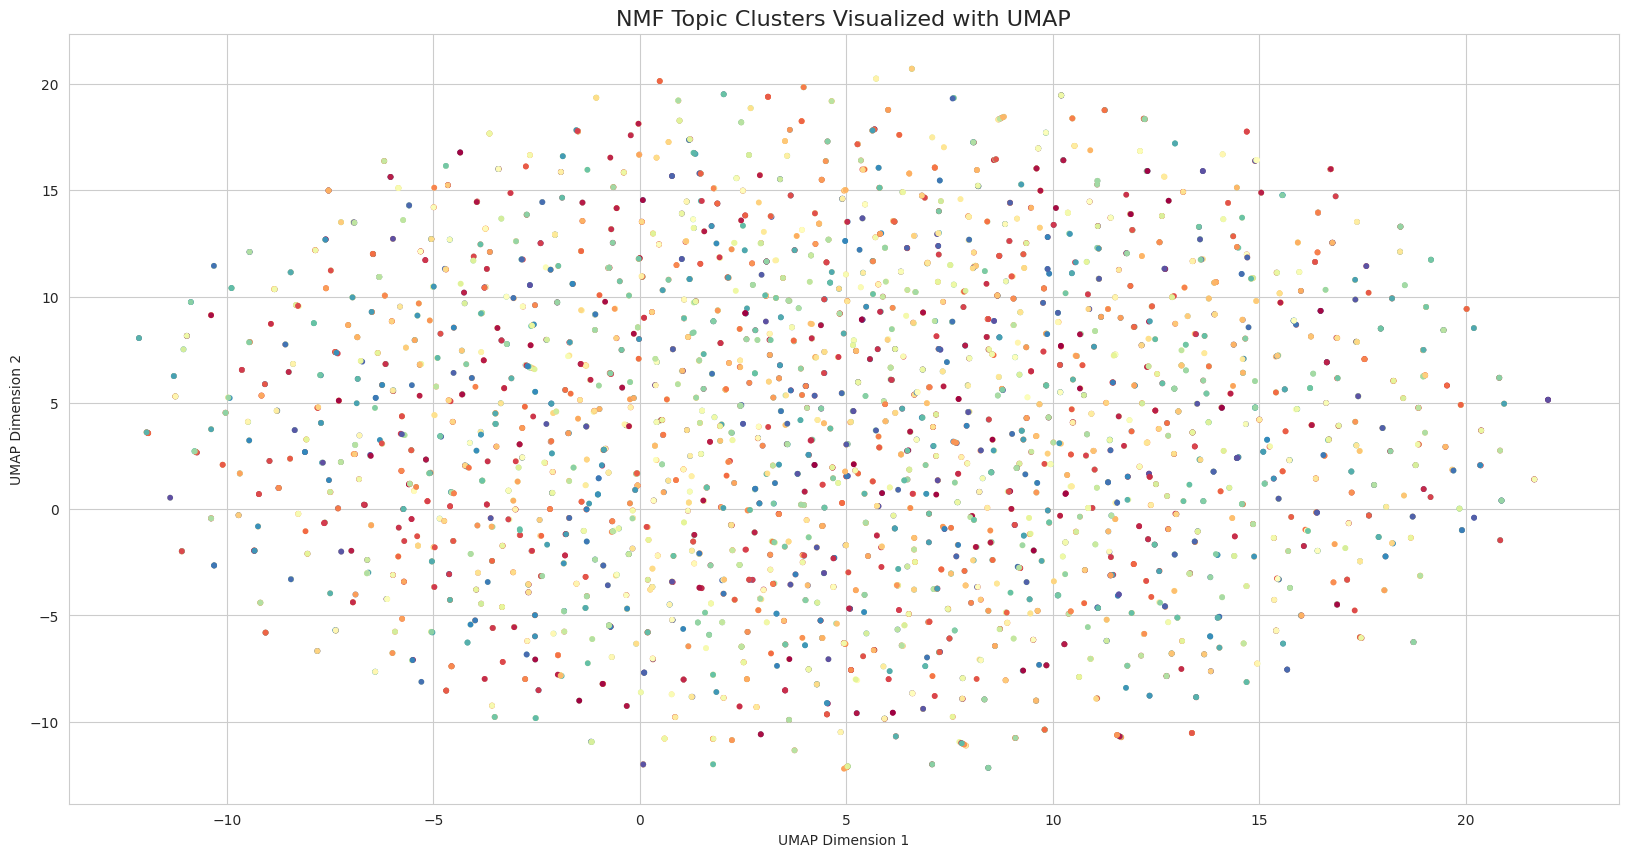

In [23]:
# Visualization
print("\n" + "="*50)
print("Visualizing Topics with UMAP")
print("="*50)

print("\nCreating UMAP embedding...")
embedding = umap.UMAP(n_neighbors=2, random_state=42).fit_transform(nmf_matrix)

plt.figure(figsize=(20, 10))
plt.title("NMF Topic Clusters Visualized with UMAP", fontsize=16)

# The 'c' parameter colors the points based on a document's genre
plt.scatter(embedding[:, 0], embedding[:, 1], 
            c=x_train["processed_summary"].astype('category').cat.codes, 
            cmap='Spectral', alpha=1.0, s=10)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


Visualizing Topics with t-SNE

Creating t-SNE embedding...


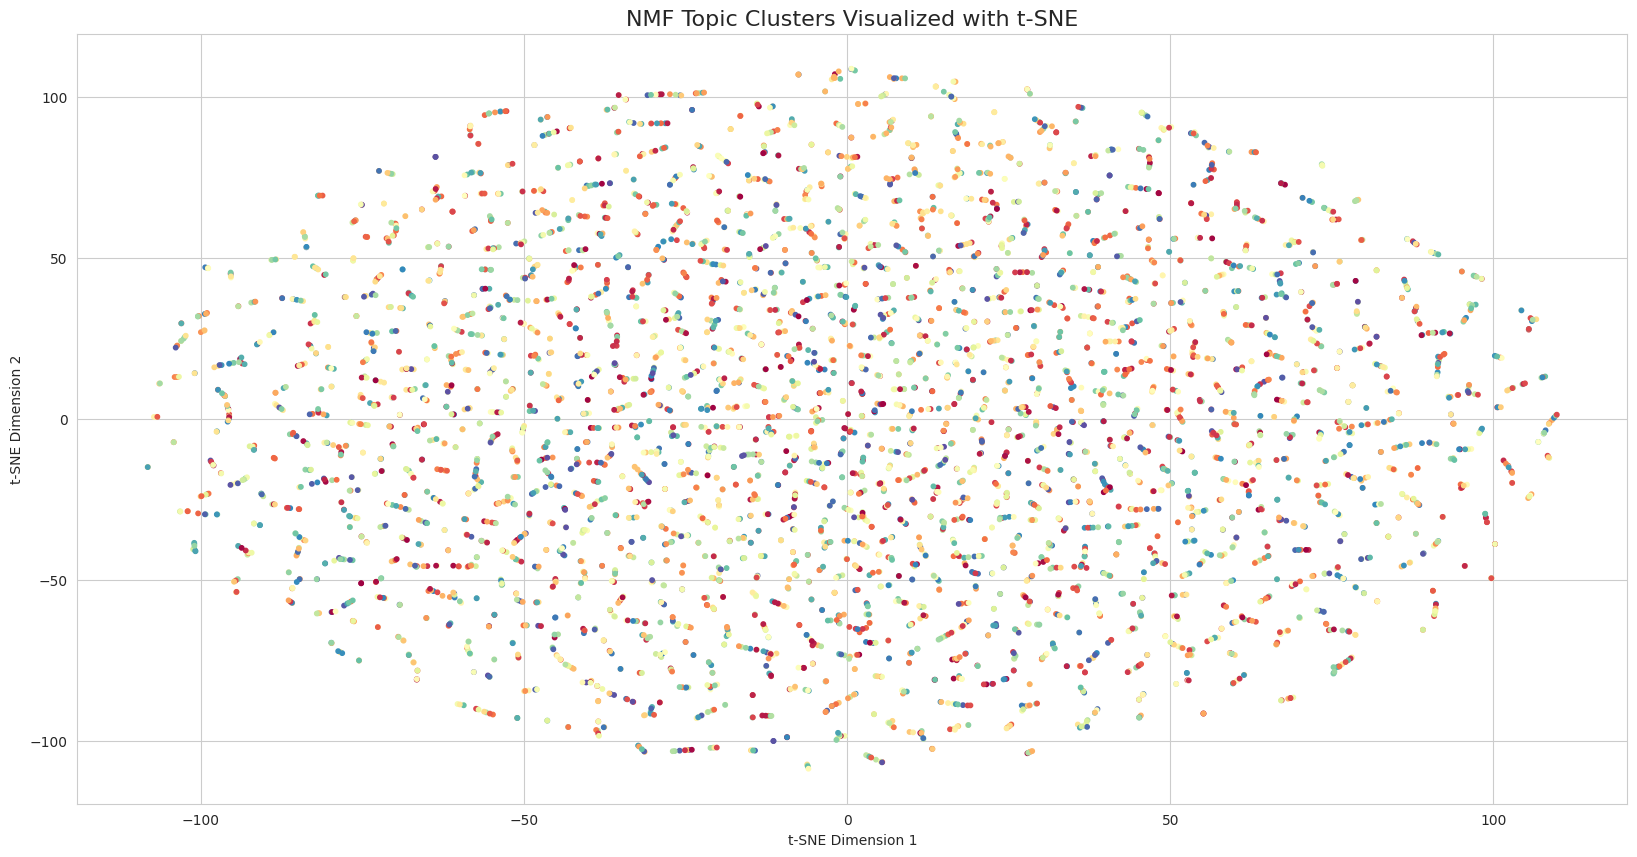

In [24]:
print("\n" + "="*50)
print("Visualizing Topics with t-SNE")
print("="*50)

print("\nCreating t-SNE embedding...")
tsne_model = TSNE(n_components=2, random_state=42, perplexity=2.0)
tsne_embedding = tsne_model.fit_transform(nmf_matrix)

plt.figure(figsize=(20, 10))
plt.title("NMF Topic Clusters Visualized with t-SNE", fontsize=16)

# The 'c' parameter colors the points based on a document's genre
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1],
            c=x_train["processed_summary"].astype('category').cat.codes,
            cmap='Spectral', alpha=1.0, s=10)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

## NMF Experiment

### What happen if we adjusting Hyperparameter for NMF (Topic Coherence)?


Adjust hyperparameters for NMF Model

> Training NMF model with 2 topics...
  Coherence Score: 0.4111

> Training NMF model with 3 topics...
  Coherence Score: 0.4736

> Training NMF model with 4 topics...
  Coherence Score: 0.5138

> Training NMF model with 5 topics...
  Coherence Score: 0.5318

> Training NMF model with 6 topics...
  Coherence Score: 0.5522

> Training NMF model with 7 topics...
  Coherence Score: 0.5641

> Training NMF model with 8 topics...
  Coherence Score: 0.5583

> Training NMF model with 9 topics...
  Coherence Score: 0.5591

Tuning Complete
Optimal number of topics (n_components): 7
Highest coherence score: 0.5641


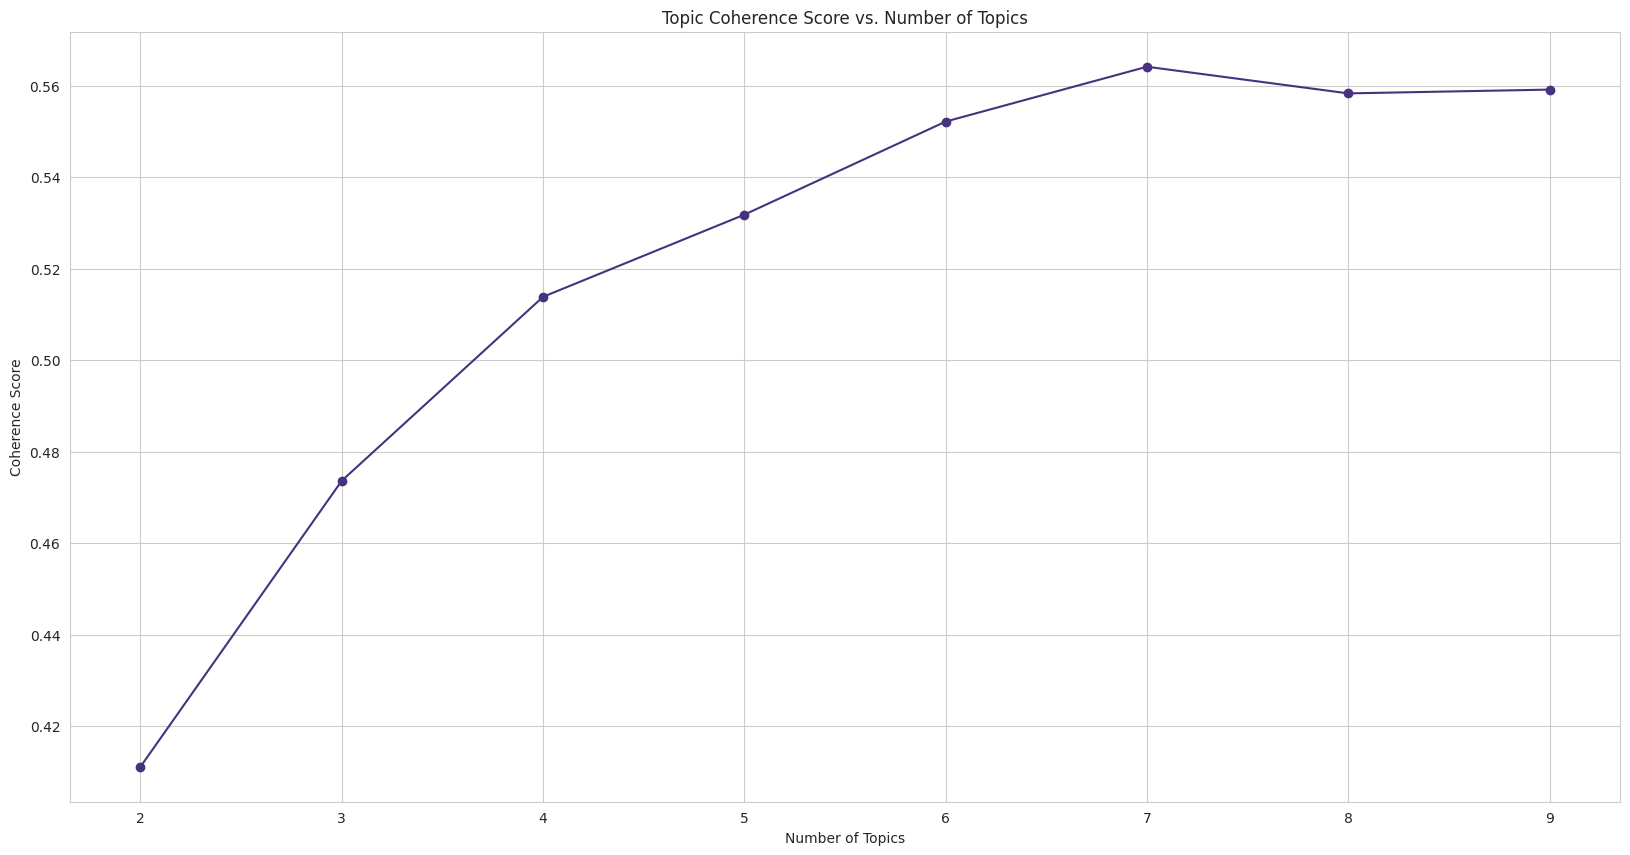

In [25]:
# Adjusting Hyperparameter for NMF (Topic Coherence)

print("\n" + "="*50)
print("Adjust hyperparameters for NMF Model")
print("="*50)

# Tokenize the documents
tokenized_docs = [doc.split() for doc in x_train['processed_summary']]

# Create the Gensim dictionary from the tokenized documents
from gensim.corpora import Dictionary
gensim_dictionary = Dictionary(tokenized_docs)

# Create a Gensim corpus (optional for this specific use case, but good practice)
gensim_corpus = [gensim_dictionary.doc2bow(doc) for doc in tokenized_docs]

# Define a range for the number of topics to test
num_topics_range = range(2, 10) 

coherence_scores = []
best_num_topics = -1
highest_coherence = -1

for num_topics in num_topics_range:
    print(f"\n> Training NMF model with {num_topics} topics...")
    
    # Train the NMF model
    nmf_model = NMF(n_components=num_topics, init='random', random_state=42)
    nmf_matrix = nmf_model.fit_transform(tfidf_matrix)
    
    # Get top words for each topic
    top_words_per_topic = []
    for topic in nmf_model.components_:
        top_words_idx = topic.argsort()[-10:][::-1]
        top_words = [terms[idx] for idx in top_words_idx]
        top_words_per_topic.append(top_words)

    # Calculate coherence score
    coherence_model = CoherenceModel(
        topics=top_words_per_topic,
        texts=tokenized_docs,
        dictionary=gensim_dictionary,
        coherence='c_v'
    )
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f"  Coherence Score: {coherence_score:.4f}")

    # Track the best model
    if coherence_score > highest_coherence:
        highest_coherence = coherence_score
        best_num_topics = num_topics

print("\n" + "="*50)
print("Tuning Complete")
print(f"Optimal number of topics (n_components): {best_num_topics}")
print(f"Highest coherence score: {highest_coherence:.4f}")
print("="*50)

# Optional: Plot the coherence scores
plt.figure(figsize=(20, 10))
plt.plot(num_topics_range, coherence_scores, marker='o')
plt.title("Topic Coherence Score vs. Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.xticks(num_topics_range)
plt.grid(True)
plt.show()

### Visualize the model with the best coherence score (NMF)


Visualizing Topics with t-SNE

 Training the NMF Model (Non-Negative Matrix Factorization)

Creating t-SNE embedding...


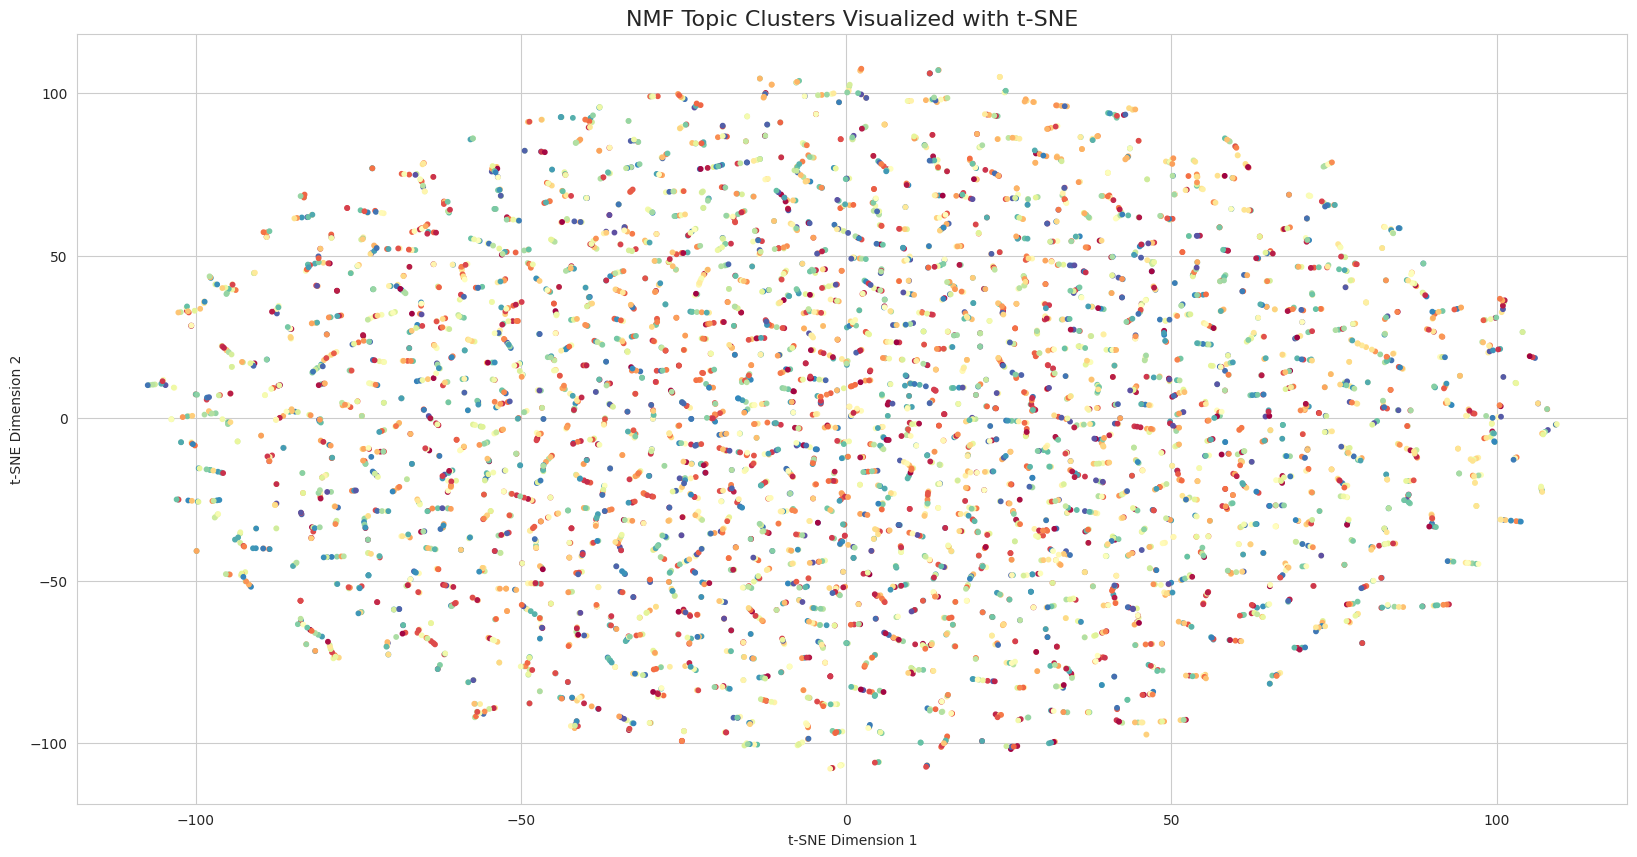

In [26]:
print("\n" + "="*50)
print("Visualizing Topics with t-SNE")
print("="*50)

# Train the NMF model
print("\n Training the NMF Model (Non-Negative Matrix Factorization)")
nmf_model = NMF(n_components=7, init='random', random_state=42)  # Using 5 topics
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

print("\nCreating t-SNE embedding...")
tsne_model = TSNE(n_components=2, random_state=42, perplexity=2.0)
tsne_embedding = tsne_model.fit_transform(nmf_matrix)

plt.figure(figsize=(20, 10))
plt.title("NMF Topic Clusters Visualized with t-SNE", fontsize=16)

# The 'c' parameter colors the points based on a document's genre
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1],
            c=x_train["processed_summary"].astype('category').cat.codes,
            cmap='Spectral', alpha=1.0, s=10)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

## LSI (Latent Semantic Indexing) - Scikit-Learn

In [27]:
# Train the LSI model using TruncatedSVD from Scikit-Learn
print("\n Training the LSI Model (TruncatedSVD)")
lsi_model = TruncatedSVD(n_components=5)  # Using 5 topics
lsi_matrix = lsi_model.fit_transform(tfidf_matrix)

# Show the LSI model components (the topics) and their top words with weights
print("\nLSI Model:")
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lsi_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]  # Get top 10 indices
    top_words_with_weights = [(terms[idx], topic[idx]) for idx in top_words_idx]
    print(f"Topic {i}:")
    print(top_words_with_weights)
print("\n" + "="*50)


 Training the LSI Model (TruncatedSVD)

LSI Model:
Topic 0:
[('model', 0.24731391590848187), ('method', 0.16980442058835188), ('datum', 0.16121350203749057), ('network', 0.16114971212382195), ('use', 0.14296824530922075), ('propose', 0.1366031843243347), ('learn', 0.12761940839541774), ('task', 0.12558332988395418), ('algorithm', 0.12257992303507281), ('approach', 0.11967074956008587)]
Topic 1:
[('language', 0.384123563821266), ('model', 0.24183810453360616), ('text', 0.19282085060646098), ('task', 0.14914636045717847), ('word', 0.14027856477904252), ('llm', 0.13434045896913283), ('pretraine', 0.1130515967124424), ('knowledge', 0.0963544189410766), ('semantic', 0.09568057729384342), ('sentence', 0.09408750721800697)]
Topic 2:
[('image', 0.46452484778576886), ('network', 0.26748183922619695), ('object', 0.22736534677650333), ('feature', 0.17122636004882524), ('segmentation', 0.15115937801950227), ('neural', 0.12681168878039994), ('detection', 0.11620262473462126), ('video', 0.112958670

## Results on 5 Sample Data Points (LSI - Scikit-Learn)

In [28]:
print("LSI Topic Model Results on 10 Sample Data Points")
print("="*50)

for i in range(min(5, len(x_train))):  # Limit to 5 or available samples
    doc = x_train.iloc[i]['processed_summary']  # Fix indexing error
    lsi_topic_scores = lsi_matrix[i]  # Get LSI topic scores for the document

    # Find the dominant topic for LSI
    lsi_dominant_topic_id = np.argmax(np.abs(lsi_topic_scores))
    lsi_dominant_topic_score = round(lsi_topic_scores[lsi_dominant_topic_id], 2)

    # Calculate weighted contributions for each LSI topic
    lsi_topic_words = []
    for j, score in enumerate(lsi_topic_scores):
        if score != 0:  # Only process non-zero scores
            weighted_topic = lsi_model.components_[j] * score
            top_words_idx = weighted_topic.argsort()[-10:][::-1]
            top_words_with_weights = [(terms[idx], round(weighted_topic[idx], 2)) for idx in top_words_idx]
            lsi_topic_words.append((f"Topic {j} (Score: {round(score, 2):.2f})", top_words_with_weights))

    # Get top words for the dominant LSI topic
    lsi_dominant_topic_vector = lsi_model.components_[lsi_dominant_topic_id]
    lsi_dominant_top_words_idx = lsi_dominant_topic_vector.argsort()[-10:][::-1]
    lsi_dominant_top_words = [(terms[idx], round(lsi_dominant_topic_vector[idx], 2)) for idx in lsi_dominant_top_words_idx]

    print(f"Sample {i+1}:")
    print(f"  Preprocessed Text: {doc}")
    print(f"  LSI Topic Scores and Words:")
    for topic_label, words in lsi_topic_words:
        print(f"    {topic_label}:")
        print(f"      {words}")
    print(f"  Dominant LSI Topic: Topic {lsi_dominant_topic_id} (Score: {lsi_dominant_topic_score:.2f})")
    print(f"    Top Words for Dominant LSI Topic:")
    print(f"      {lsi_dominant_top_words}")
    print("-" * 25)

LSI Topic Model Results on 10 Sample Data Points
Sample 1:
  Preprocessed Text: selfsupervise monocular depth estimation aiming learn scene depth single image selfsupervise manner receive much attention spite recent effort field learn accurate scene depth alleviate negative influence occlusion selfsupervise depth estimation remain open problem address problem analyze effect continuous discrete depth constraint use training process many exist work inspire empirical analysis propose novel network occlusionaware coarsetofine depth map selfsupervise monocular depth estimation call ocfdnet give arbitrary training set stereo image pair propose ocfdnet employ discrete depth constraint learn coarselevel depth map employ continuous depth constraint learn scene depth residual result finelevel depth map addition occlusionaware module design propose ocfdnet able improve capability learn finelevel depth map handle occlusion experimental result kitti demonstrate propose method outperform comparative


Visualizing Topics with UMAP

Creating UMAP embedding...


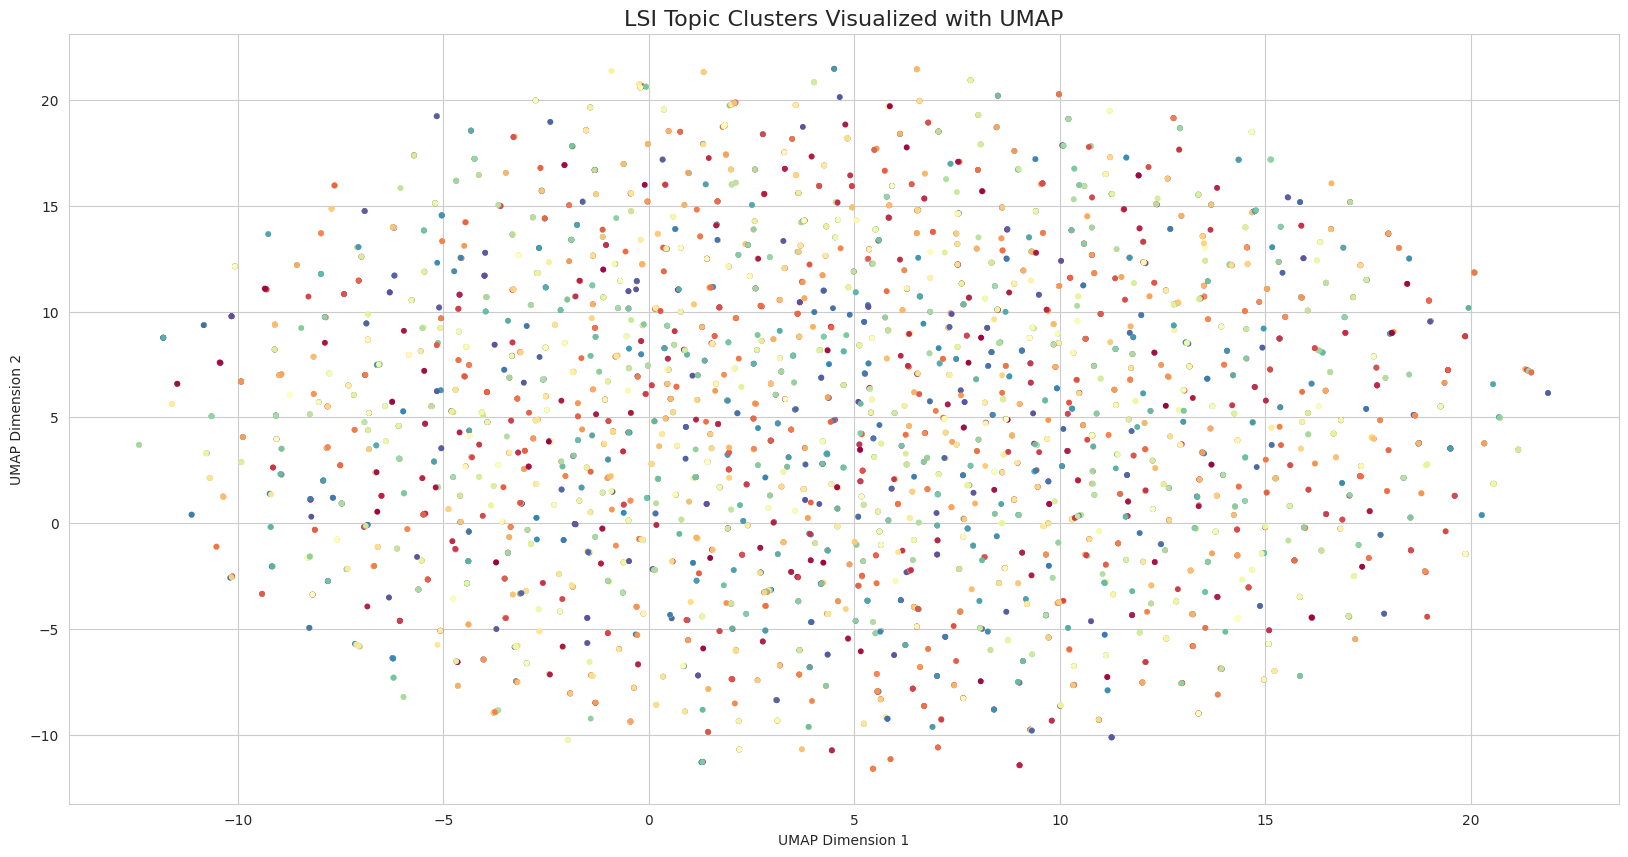

In [29]:
# Visualization Section
print("\n" + "="*50)
print("Visualizing Topics with UMAP")
print("="*50)

print("\nCreating UMAP embedding...")
embedding = umap.UMAP(n_neighbors=2, random_state=42).fit_transform(lsi_matrix)

plt.figure(figsize=(20, 10))
plt.title("LSI Topic Clusters Visualized with UMAP", fontsize=16)

# The 'c' parameter colors the points based on a document's genre
plt.scatter(embedding[:, 0], embedding[:, 1], 
            c=x_train["processed_summary"].astype('category').cat.codes, 
            cmap='Spectral', alpha=1.0, s=10)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


Visualizing Topics with t-SNE

Creating t-SNE embedding...


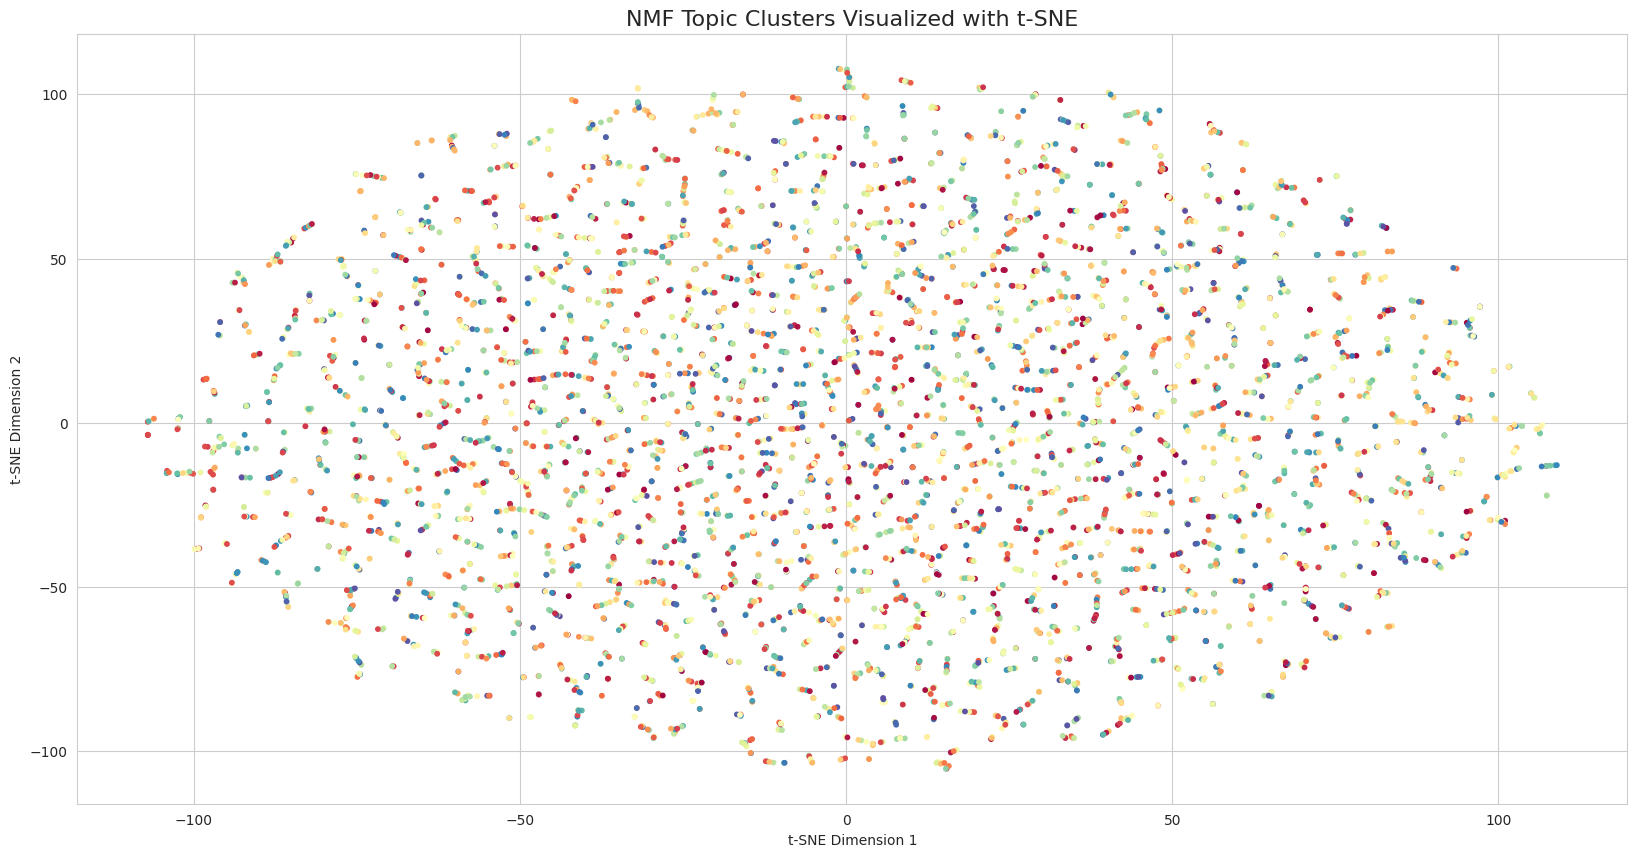

In [30]:
print("\n" + "="*50)
print("Visualizing Topics with t-SNE")
print("="*50)

print("\nCreating t-SNE embedding...")
tsne_model = TSNE(n_components=2, random_state=42, perplexity=2.0)
tsne_embedding = tsne_model.fit_transform(lsi_matrix)

plt.figure(figsize=(20, 10))
plt.title("NMF Topic Clusters Visualized with t-SNE", fontsize=16)

# The 'c' parameter colors the points based on a document's genre
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1],
            c=x_train["processed_summary"].astype('category').cat.codes,
            cmap='Spectral', alpha=1.0, s=10)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

### What happen if we adjusting Hyperparameter for LSI (Topic Coherence)?


Adjust hyperparameters for LSI Model

> Training LSI model with 2 topics...
  Coherence Score: 0.4867

> Training LSI model with 3 topics...
  Coherence Score: 0.5403

> Training LSI model with 4 topics...
  Coherence Score: 0.5622

> Training LSI model with 5 topics...
  Coherence Score: 0.5583

> Training LSI model with 6 topics...
  Coherence Score: 0.5283

> Training LSI model with 7 topics...
  Coherence Score: 0.5097

> Training LSI model with 8 topics...
  Coherence Score: 0.4861

> Training LSI model with 9 topics...
  Coherence Score: 0.4839

Tuning Complete
Optimal number of topics (n_components): 4
Highest coherence score: 0.5622


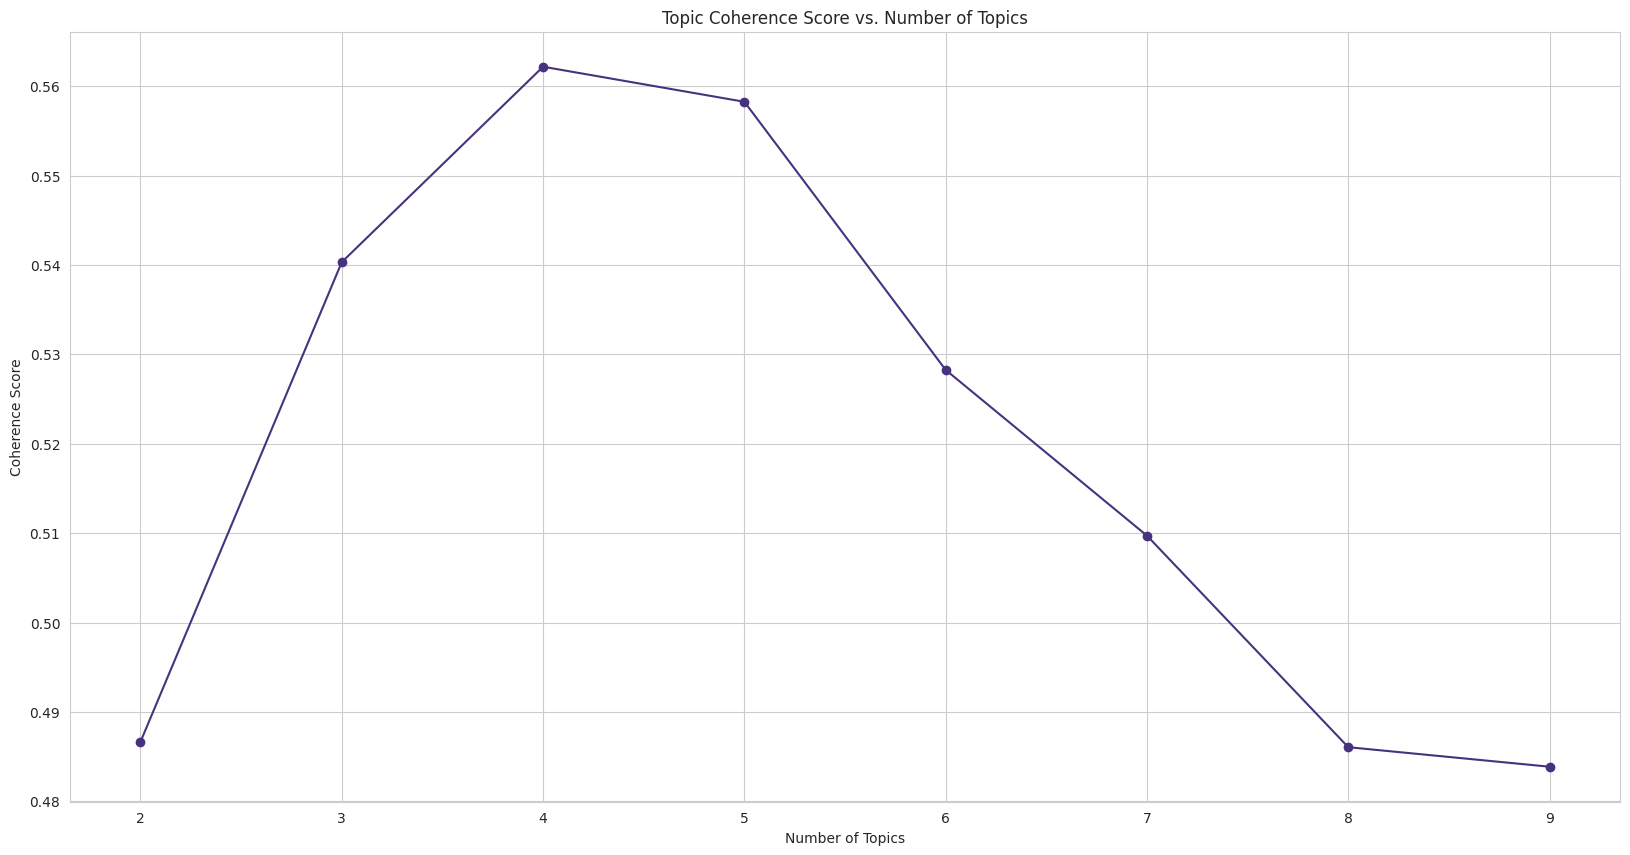

In [31]:
#Hyperparameter Tuning for LSI (Topic Coherence)

print("\n" + "="*50)
print("Adjust hyperparameters for LSI Model")
print("="*50)

# Tokenize the documents
tokenized_docs = [doc.split() for doc in x_train['processed_summary']]

# Create the Gensim dictionary from the tokenized documents
from gensim.corpora import Dictionary
gensim_dictionary = Dictionary(tokenized_docs)

# Create a Gensim corpus (optional for this specific use case, but good practice)
gensim_corpus = [gensim_dictionary.doc2bow(doc) for doc in tokenized_docs]

# Define a range for the number of topics
num_topics_range = range(2, 10) # Small range for demonstration

coherence_scores = []
best_num_topics = -1
highest_coherence = -1

for num_topics in num_topics_range:
    print(f"\n> Training LSI model with {num_topics} topics...")
    
    # Train the LSI model
    lsi_model = TruncatedSVD(n_components=num_topics, random_state=42)
    lsi_matrix = lsi_model.fit_transform(tfidf_matrix)
    
    # Get top words for each topic
    top_words_per_topic = []
    for topic in lsi_model.components_:
        top_words_idx = topic.argsort()[-10:][::-1]
        top_words = [terms[idx] for idx in top_words_idx]
        top_words_per_topic.append(top_words)

    # Calculate coherence score
    coherence_model = CoherenceModel(
        topics=top_words_per_topic,
        texts=tokenized_docs,
        dictionary=gensim_dictionary,
        coherence='c_v'
    )
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f"  Coherence Score: {coherence_score:.4f}")

    # Track the best model
    if coherence_score > highest_coherence:
        highest_coherence = coherence_score
        best_num_topics = num_topics

print("\n" + "="*50)
print("Tuning Complete")
print(f"Optimal number of topics (n_components): {best_num_topics}")
print(f"Highest coherence score: {highest_coherence:.4f}")
print("="*50)

# Optional: Plot the coherence scores
plt.figure(figsize=(20, 10))
plt.plot(num_topics_range, coherence_scores, marker='o')
plt.title("Topic Coherence Score vs. Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.xticks(num_topics_range)
plt.grid(True)
plt.show()

### Visualize the model with the best coherence score (LSI)


Visualizing Topics with t-SNE

> Training the LSI Model (TruncatedSVD)

Creating t-SNE embedding...


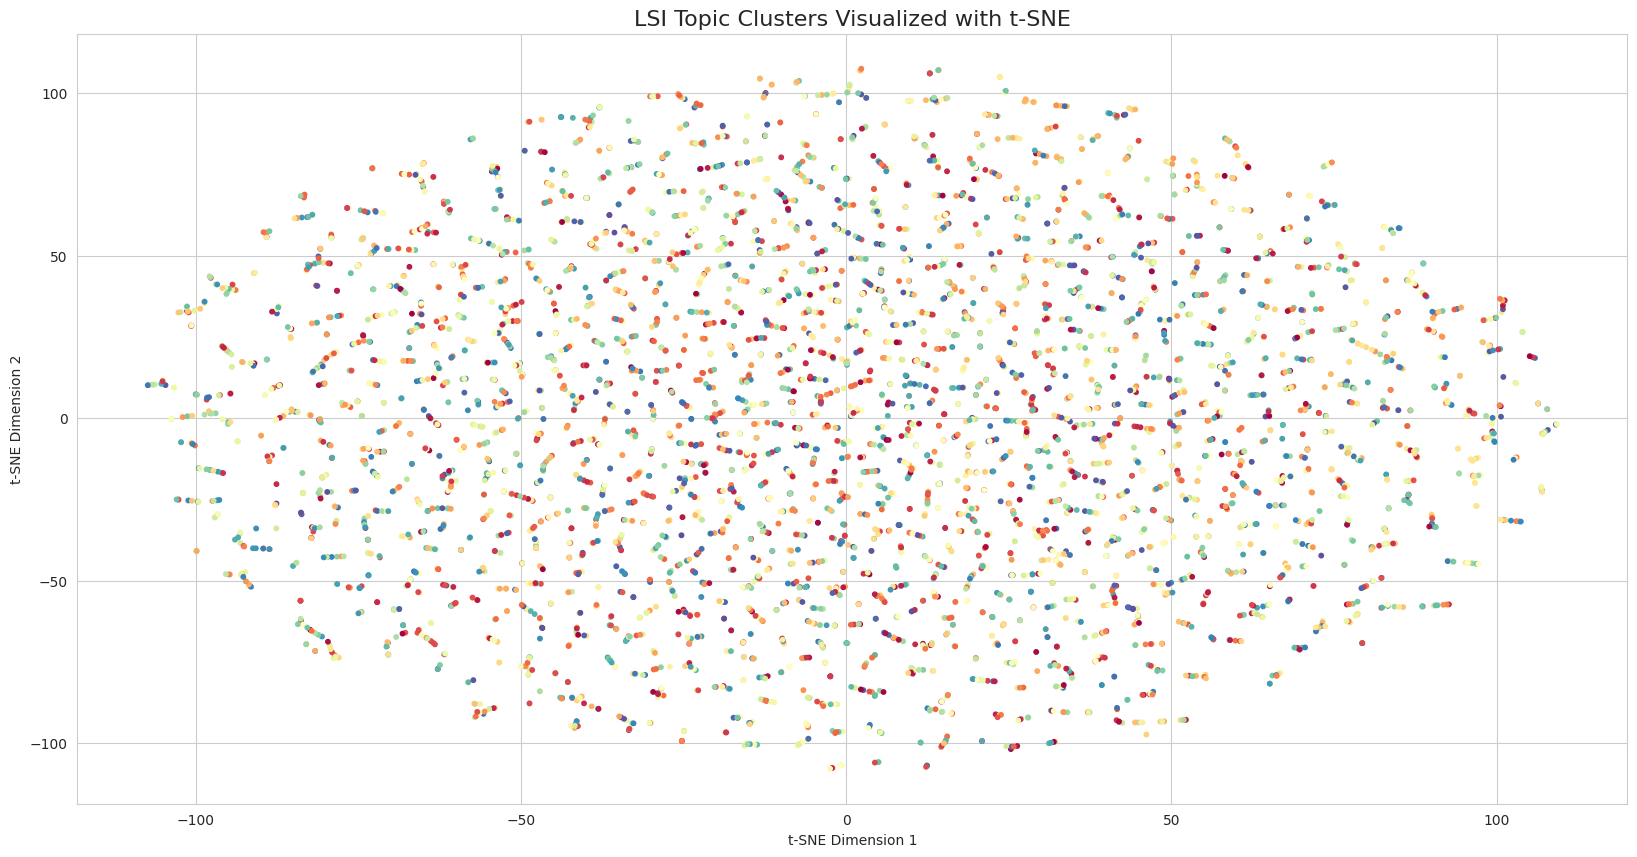

In [32]:
print("\n" + "="*50)
print("Visualizing Topics with t-SNE")
print("="*50)

# Train the LSI model using TruncatedSVD
print("\n> Training the LSI Model (TruncatedSVD)")
lsi_model = TruncatedSVD(n_components=4)  # Using 5 topics
lsi_matrix = lsi_model.fit_transform(tfidf_matrix)

print("\nCreating t-SNE embedding...")
# Perplexity should be smaller than the number of samples.
# Here, we use 2.0 as an example for a small dataset.
tsne_model = TSNE(n_components=2, random_state=42, perplexity=2.0)
tsne_embedding = tsne_model.fit_transform(nmf_matrix)

plt.figure(figsize=(20, 10))
plt.title("LSI Topic Clusters Visualized with t-SNE", fontsize=16)

# The 'c' parameter colors the points based on a document's genre
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1],
            c=x_train["processed_summary"].astype('category').cat.codes,
            cmap='Spectral', alpha=1.0, s=10)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

## Model Validation NMF

In [33]:
## Validation Using Topic Coherence Score ##
print("Validating Model with Topic Coherence Score")
print("="*50)

# 1. Get top words for each topic as a list of lists
# This format is required by the Gensim CoherenceModel.
top_words_per_topic = []
for topic in nmf_model.components_:
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [terms[idx] for idx in top_words_idx]
    top_words_per_topic.append(top_words)

# 2. Prepare the data in Gensim format
# The CoherenceModel needs the original tokenized text and a Gensim dictionary.
tokenized_docs = [doc.split() for doc in x_train['processed_summary']]
gensim_dictionary = Dictionary(tokenized_docs)

# 3. Calculate the coherence score
coherence_model_nmf = CoherenceModel(
    topics=top_words_per_topic,
    texts=tokenized_docs,
    dictionary=gensim_dictionary,
    coherence='c_v' # 'c_v' is a common and robust choice for topic coherence.
)

coherence_score = coherence_model_nmf.get_coherence()
print(f"The Topic Coherence Score for the NMF model is: {coherence_score:.4f}")

Validating Model with Topic Coherence Score
The Topic Coherence Score for the NMF model is: 0.5641


## Model Validation LSI

In [34]:
### Validation Using Topic Coherence Score ###
print("Validating Model with Topic Coherence Score")
print("="*50)

# 1. Get top words for each topic as a list of lists
# This is the format required by the Gensim CoherenceModel.
top_words_per_topic = []
for topic in lsi_model.components_:
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [terms[idx] for idx in top_words_idx]
    top_words_per_topic.append(top_words)

# 2. Prepare the data in Gensim format
# The CoherenceModel needs the original tokenized text and a Gensim dictionary.
tokenized_docs = [doc.split() for doc in x_train['processed_summary']]
gensim_dictionary = Dictionary(tokenized_docs)

# 3. Calculate the coherence score
coherence_model_lsi = CoherenceModel(
    topics=top_words_per_topic,
    texts=tokenized_docs,
    dictionary=gensim_dictionary,
    coherence='c_v'
)

coherence_score = coherence_model_lsi.get_coherence()
print(f"The Topic Coherence Score for the LSI model is: {coherence_score:.4f}")

Validating Model with Topic Coherence Score
The Topic Coherence Score for the LSI model is: 0.5550


# Model Evaluation

**Topic Coherence**
Topic coherence is the most important quantitative metric. It measures how semantically consistent a topic's top words are with one another. A high coherence score means the top words in a topic are closely related and make sense to a human reader. For example, a topic with words like {"astronomy," "telescope," "planet," "star"} would have a high coherence score, while {"car," "apple," "tree," "computer"} would have a low one.

**Common coherence measures include:**

**Normalized Pointwise Mutual Information(C_V)**: A robust and widely used metric that calculates the co-occurrence of words within a sliding window of the documents.

**UMass**: A simpler measure based on the log of the conditional probability of one word appearing given another.

**In this note book will use Normalized Pointwise Mutual Information (C_V) to evaluate the model**

## Evaluating NMF Model on Test Data

In [35]:
print("\n" + "="*50)
print("Evaluating Model on Test Data")
print("="*50)

# First, transform the test data using the models fitted on the training data.
print("\n Vectorizing Test Data")
doc_term_matrix_test = vectorizer.transform(x_test['processed_summary'])
tfidf_matrix_test = tfidf_transformer.transform(doc_term_matrix_test)

print("\n Transforming Test Data with Trained NMF Model")
nmf_matrix_test = nmf_model.transform(tfidf_matrix_test)
print("Shape of NMF Matrix for Test Data (docs x topics):", nmf_matrix_test.shape)

# Now, we'll calculate the topic coherence for the topics derived from the TEST data.
# This requires the same steps as on the training data, but with test set information.
print("\n Calculating Topic Coherence Score on Test Data")

# 1. Get top words for each topic (using the same topics from the TRAIN model)
top_words_per_topic = []
for topic in nmf_model.components_:
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [terms[idx] for idx in top_words_idx]
    top_words_per_topic.append(top_words)

# 2. Prepare test data for Gensim
tokenized_docs_test = [doc.split() for doc in x_test['processed_summary']]
gensim_dictionary_test = Dictionary(tokenized_docs_test)
gensim_dictionary_test.filter_tokens(list(set(terms))) # Use the vocabulary from the training set

# 3. Calculate the coherence score
# Note: It's common to use the same dictionary from the training data for this,
# but to be robust, we'll re-map words to a new dictionary based on test data tokens.
# A more robust approach would be to add the training dictionary to the test dictionary.
coherence_model_nmf_test = CoherenceModel(
    topics=top_words_per_topic,
    texts=tokenized_docs_test,
    dictionary=gensim_dictionary_test,
    coherence='c_v'
)

coherence_score_test = coherence_model_nmf_test.get_coherence()
print(f"The Topic Coherence Score for the NMF model on the TEST set is: {coherence_score_test:.4f}")


Evaluating Model on Test Data

 Vectorizing Test Data

 Transforming Test Data with Trained NMF Model
Shape of NMF Matrix for Test Data (docs x topics): (1363, 7)

 Calculating Topic Coherence Score on Test Data
The Topic Coherence Score for the NMF model on the TEST set is: 0.5207


## Visualize NMF model on test dataset


Visualizing Topics with UMAP

Creating UMAP embedding...


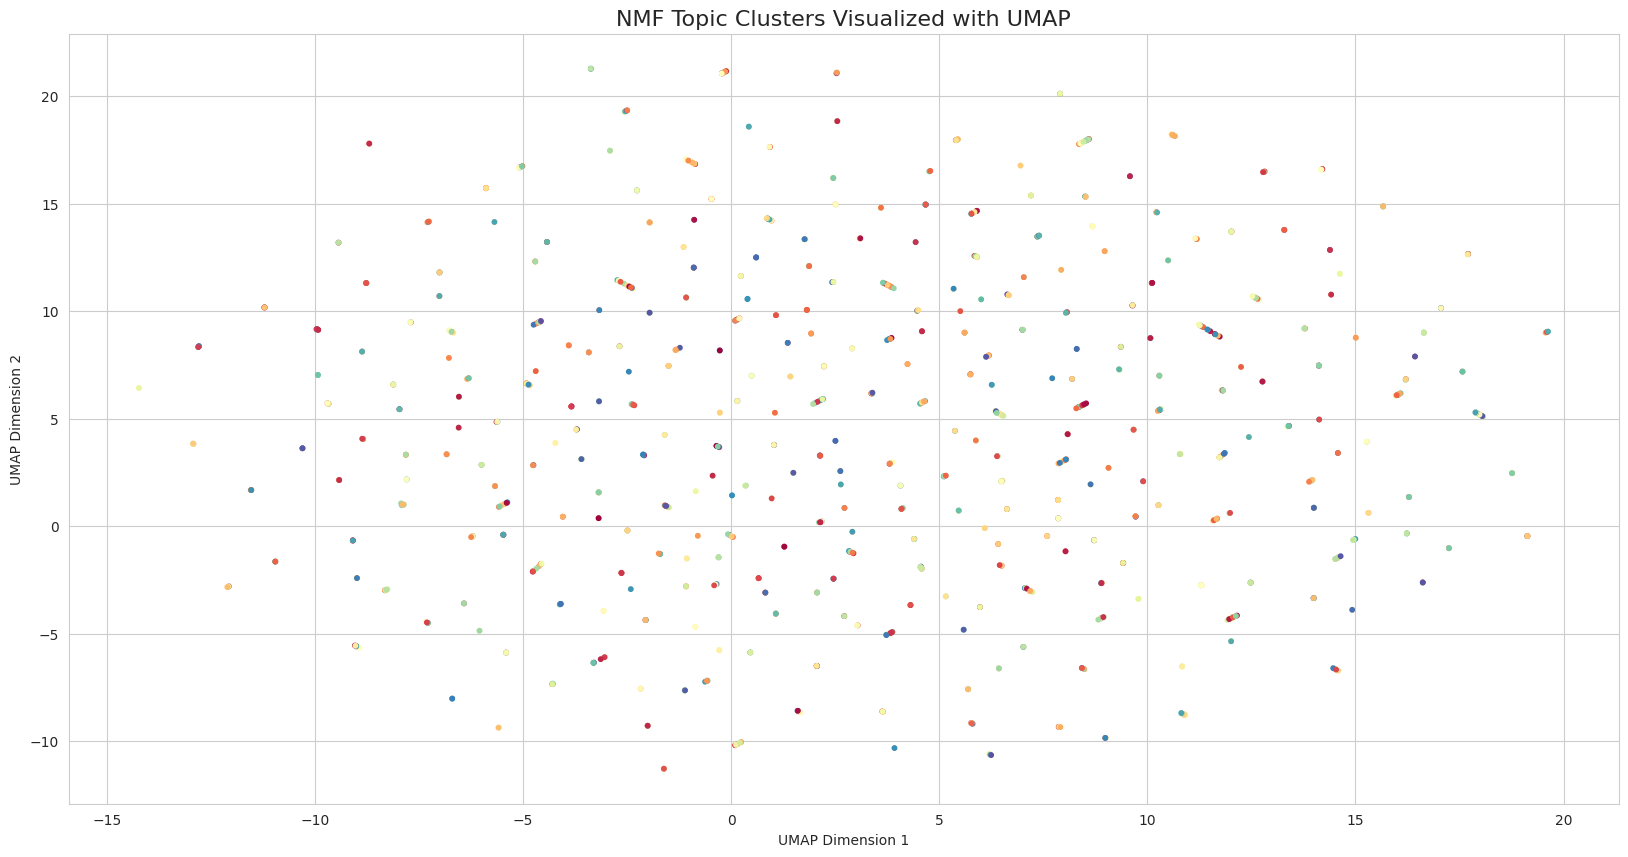

In [36]:
print("\n" + "="*50)
print("Visualizing Topics with UMAP")
print("="*50)

print("\nCreating UMAP embedding...")
# The UMAP model is created on the NMF output of the test set
embedding = umap.UMAP(n_neighbors=2, random_state=42).fit_transform(nmf_matrix_test)

plt.figure(figsize=(20, 10))
plt.title("NMF Topic Clusters Visualized with UMAP", fontsize=16)

# The 'c' parameter must now use the test data to match the embedding size
plt.scatter(embedding[:, 0], embedding[:, 1],
            c=x_test["processed_summary"].astype('category').cat.codes,
            cmap='Spectral', alpha=1.0, s=10)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


Visualizing Topics with t-SNE

Creating t-SNE embedding for test data...


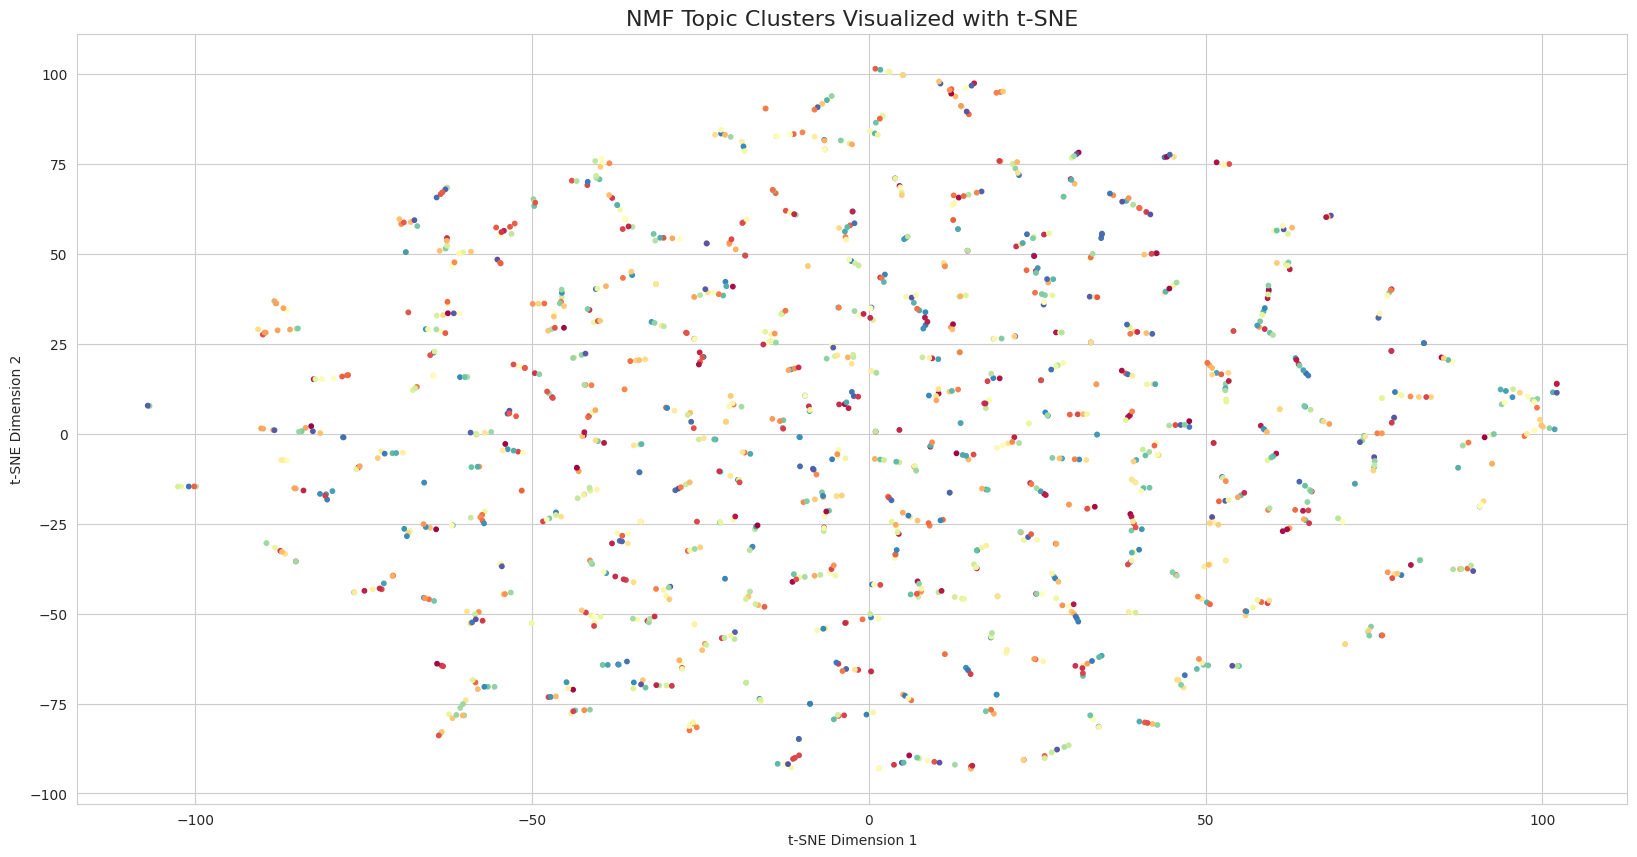

In [37]:
print("\n" + "="*50)
print("Visualizing Topics with t-SNE")
print("="*50)

print("\nCreating t-SNE embedding for test data...")
# The t-SNE model is created on the NMF output of the test set
tsne_model = TSNE(n_components=2, random_state=42, perplexity=2.0)
tsne_embedding = tsne_model.fit_transform(nmf_matrix_test)

plt.figure(figsize=(20, 10))
plt.title("NMF Topic Clusters Visualized with t-SNE", fontsize=16)

# The 'c' parameter now uses the test data
# Note: You need to create a new category for the test data for coloring.
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1],
            c=x_test["processed_summary"].astype('category').cat.codes,
            cmap='Spectral', alpha=1.0, s=10)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

## Evaluation LSI model on Test Data

In [38]:
### Evaluation on Test Data ###
print(" Evaluating Model on Test Data")
print("="*50)

# First, transform the test data using the models fitted on the training data.
print("\n  Vectorizing Test Data with the trained CountVectorizer")
# Use ONLY `transform` to apply the training vocabulary to the test data.
doc_term_matrix_test = vectorizer.transform(x_test['processed_summary'])

print("\n Converting Test Data to TF-IDF with the trained TfidfTransformer")
# Use ONLY `transform` to apply the training IDF values to the test data.
tfidf_matrix_test = tfidf_transformer.transform(doc_term_matrix_test)

print("\n Transforming Test Data with the trained LSI Model")
# Apply the LSI model to the test data to get document-topic distributions.
lsi_matrix_test = lsi_model.transform(tfidf_matrix_test)
print("Shape of LSI Matrix for Test Data (docs x topics):", lsi_matrix_test.shape)
print("Sample LSI scores for first test document:")
print(np.round(lsi_matrix_test[0], 4))

# You can also get a coherence score on the test set, but it's a measure of topic
# quality, not generalization performance.
print("\n Calculating Topic Coherence Score on Test Data")

# Get top words for each topic (from the LSI model trained on the training data)
top_words_per_topic = []
for topic in lsi_model.components_:
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [terms[idx] for idx in top_words_idx]
    top_words_per_topic.append(top_words)

# Prepare test data for Gensim
tokenized_docs_test = [doc.split() for doc in x_test['processed_summary']]
gensim_dictionary_test = Dictionary(tokenized_docs_test)
gensim_dictionary_test.filter_tokens(list(set(terms))) # Ensure dictionary only contains words from training set

coherence_model_lsi_test = CoherenceModel(
    topics=top_words_per_topic,
    texts=tokenized_docs_test,
    dictionary=gensim_dictionary_test,
    coherence='c_v'
)

coherence_score_test = coherence_model_lsi_test.get_coherence()
print(f"The Topic Coherence Score for the LSI model on the TEST set is: {coherence_score_test:.4f}")

 Evaluating Model on Test Data

  Vectorizing Test Data with the trained CountVectorizer

 Converting Test Data to TF-IDF with the trained TfidfTransformer

 Transforming Test Data with the trained LSI Model
Shape of LSI Matrix for Test Data (docs x topics): (1363, 4)
Sample LSI scores for first test document:
[ 0.2416 -0.0339  0.0547  0.0646]

 Calculating Topic Coherence Score on Test Data
The Topic Coherence Score for the LSI model on the TEST set is: 0.5197


## Visualize LSI model on test dataset


Visualizing Topics with UMAP

Creating UMAP embedding...


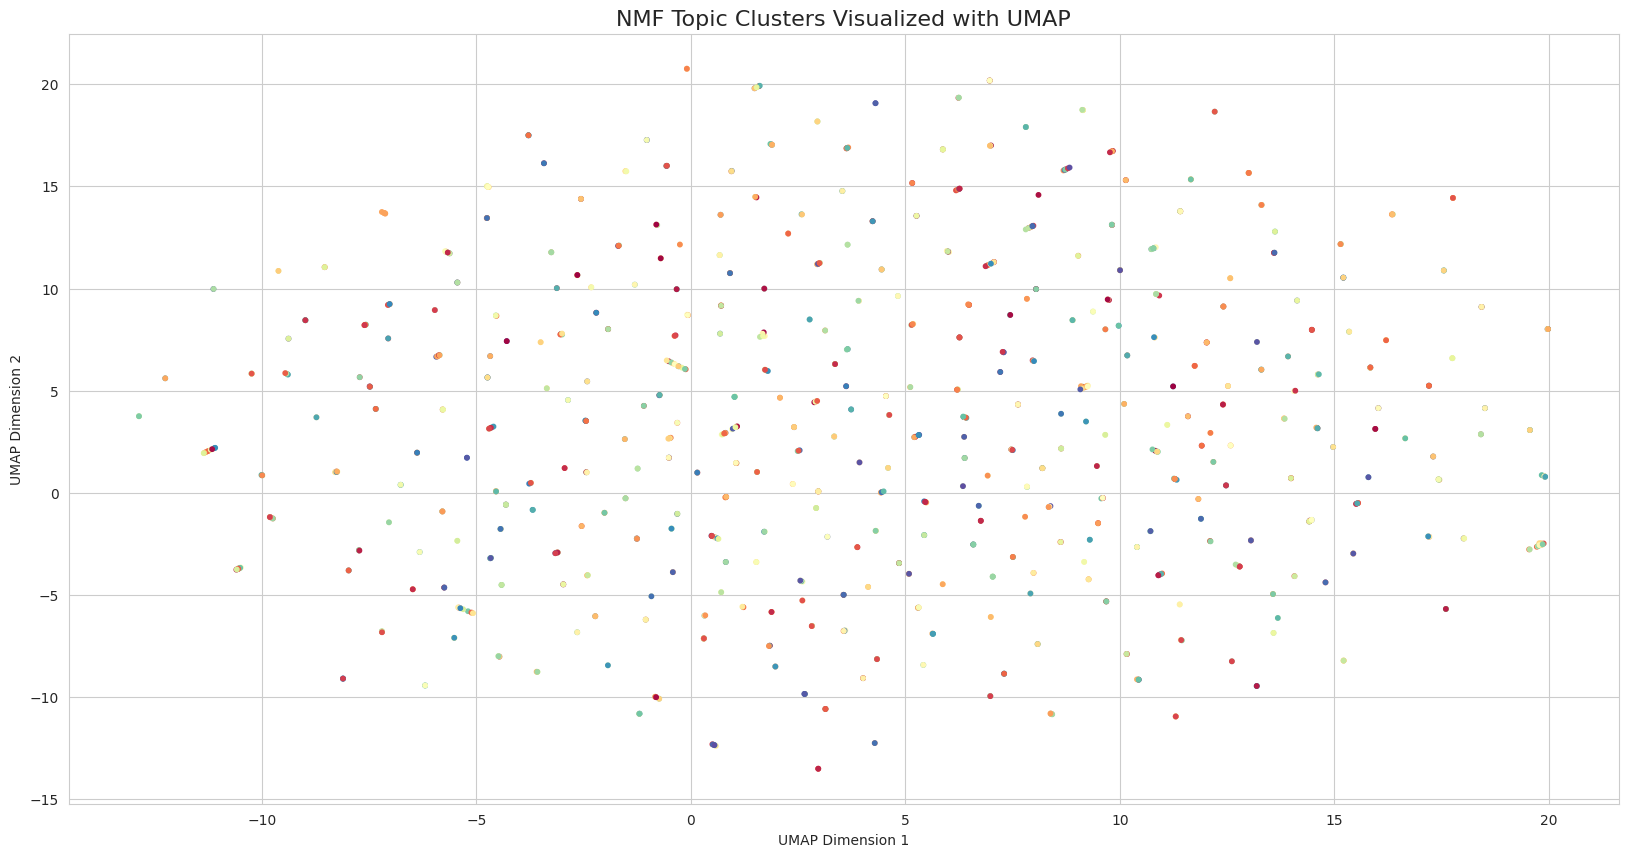

In [39]:
print("\n" + "="*50)
print("Visualizing Topics with UMAP")
print("="*50)

print("\nCreating UMAP embedding...")
# The UMAP model is created on the NMF output of the test set
embedding = umap.UMAP(n_neighbors=2, random_state=42).fit_transform(lsi_matrix_test)

plt.figure(figsize=(20, 10))
plt.title("NMF Topic Clusters Visualized with UMAP", fontsize=16)

# The 'c' parameter must now use the test data to match the embedding size
plt.scatter(embedding[:, 0], embedding[:, 1],
            c=x_test["processed_summary"].astype('category').cat.codes,
            cmap='Spectral', alpha=1.0, s=10)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


Visualizing Topics with t-SNE

Creating t-SNE embedding for test data...


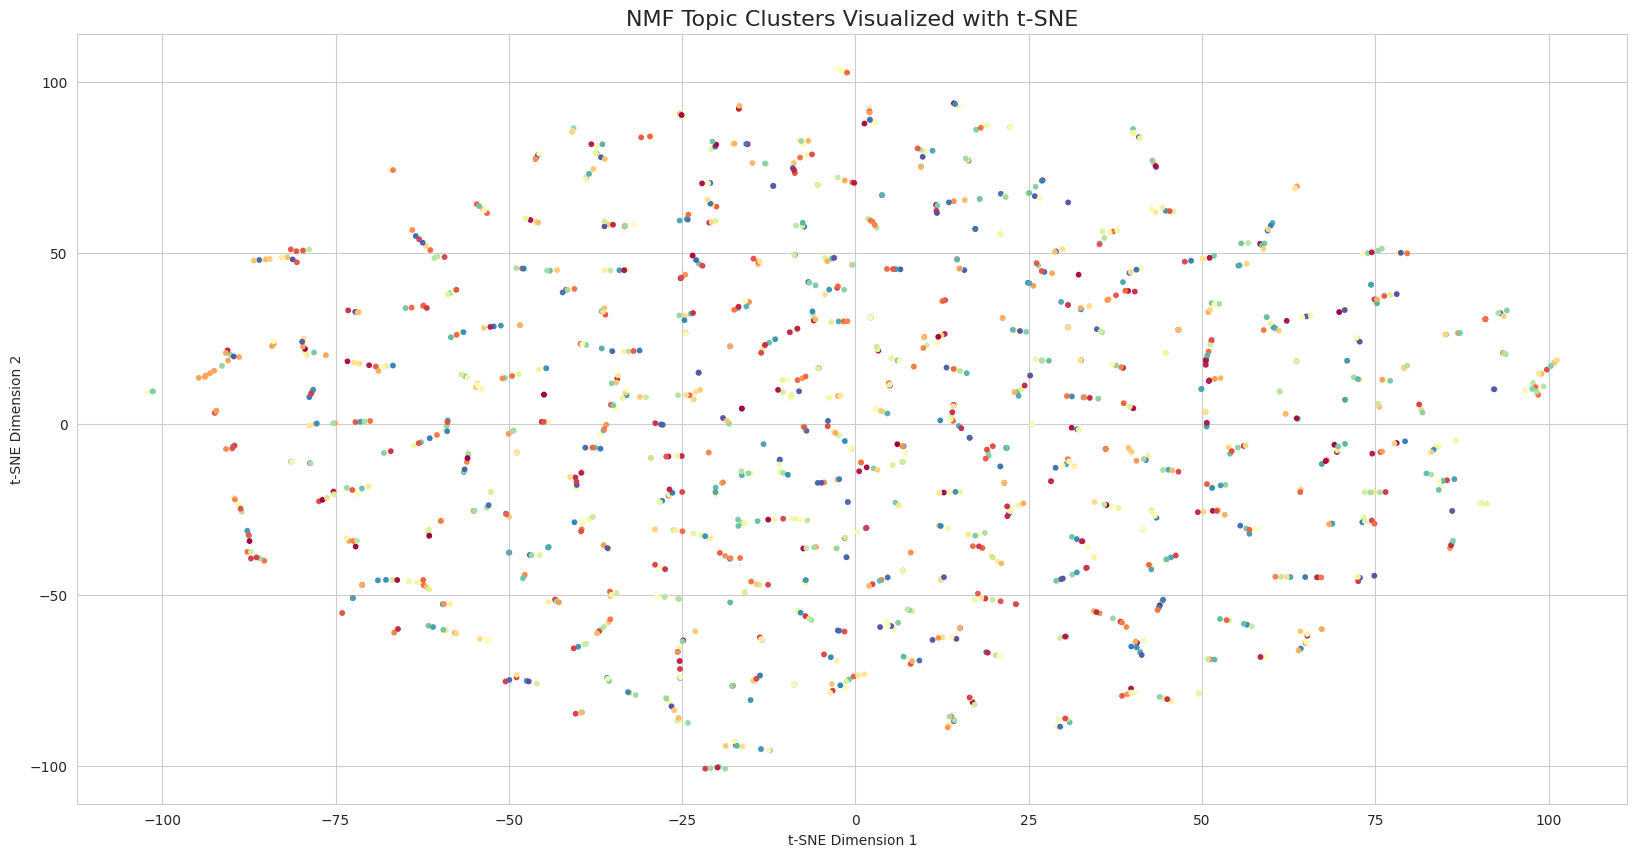

In [40]:
print("\n" + "="*50)
print("Visualizing Topics with t-SNE")
print("="*50)

print("\nCreating t-SNE embedding for test data...")
# The t-SNE model is created on the NMF output of the test set
tsne_model = TSNE(n_components=2, random_state=42, perplexity=2.0)
tsne_embedding = tsne_model.fit_transform(lsi_matrix_test)

plt.figure(figsize=(20, 10))
plt.title("NMF Topic Clusters Visualized with t-SNE", fontsize=16)

# The 'c' parameter now uses the test data
# Note: You need to create a new category for the test data for coloring.
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1],
            c=x_test["processed_summary"].astype('category').cat.codes,
            cmap='Spectral', alpha=1.0, s=10)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()